<a href="https://colab.research.google.com/github/LePhongCongThanh/car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *CAR PRICE PREDICTION*

*Thanh  Le*

>***The Goal of this project is to predict the price of each type of car based on its data fields/related information***
>>*The dataset of car was released by Deep Contractor from Kaggle with goal of practicing regression by predicting the prices of different cars*


####1.Import Libaries and Data

In [115]:
import numpy as np
import pandas as pd
import re
from typing import Tuple, Type

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # Or any other font that supports Georgian script


from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


# For execution time calculation
from datetime import datetime
from datetime import timedelta
import random
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [116]:
car_price = pd.read_csv('https://raw.githubusercontent.com/LePhongCongThanh/car_price_prediction/main/car_price_prediction.csv') 
car_price.info()
car_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


>*Its shape of data is 19237 rows x 18 columns, there are fields of " ID, Price, Prod. year, Cylinders, Airbags " being numeric type, and the others are string types, but maybe there'll be some cols whose dtypes can be transformed into "int"*

>>*It's easy to see that "Levy, Engine volume and Mileage field" can be transformed into numertic type. Need to check later in the next steps*


####2.Data Cleanning and Pre-processing 


##### 2.1 Check duplicates and dtypes of data

***ID Field***

>*ID is a field that uniquely identify  each record in a table, so it's certain to prevent duplicated values in this column.* 

In [117]:
duplicates = car_price.duplicated(subset="ID")
duplicate_records = car_price[duplicates]
duplicate_records.head()
print('The number of duplicated values in ID field is', len(duplicate_records))
print('The number of unique duplicated values in ID field is', duplicate_records['ID'].nunique())


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4


The number of duplicated values in ID field is 313
The number of unique duplicated values in ID field is 220


>*There're 313 values being duplicated in "ID field". At next steps, it's needed to clarify that with each set of duplicated values in " ID field", check whether the other fields of its set are alike or not.*

In [118]:

car_price.loc[car_price['ID']==45815372,:]
car_price.loc[car_price['ID']==45815363,:]
car_price.loc[car_price['ID']==45732125,:]


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
330,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
7138,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
7796,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
9965,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
10338,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
725,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
6037,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
7944,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
8281,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
14150,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1584,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12


>*It's easier to see that with each duplicated ID, the other fields is the same, So we need to remove duplicates*

In [119]:
def drop_dup(df:pd.DataFrame, column:list): 
    df2 = df.drop_duplicates(subset=column)
    return df2

# Drop duplicates of subset "ID"
car_price_new = drop_dup(car_price, 'ID')
car_price_new.head()
car_price_new.info()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

>*the new dataset has shape of 18924 rows x 18 columns*

##### 2.2 Check Missing Values

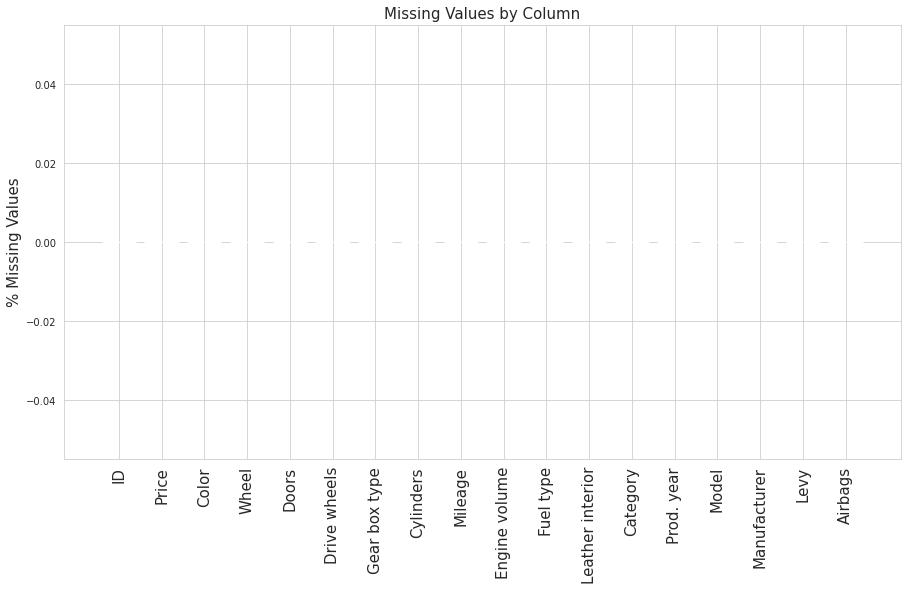

In [120]:
# Plot a bar chart of the missing percentages
missing_pct = (car_price_new.isnull().sum() / len(car_price_new)) * 100
missing_pct = missing_pct.sort_values(ascending=False) # Sort columns by percentage of missing values
plt.figure(figsize=(15, 8))
plt.bar(missing_pct.index, missing_pct.values)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('% Missing Values',fontsize=15)
plt.title('Missing Values by Column',fontsize=15)
plt.show();

>*There're no missing values, but sometimes missing values will be presented  "--", "...", or something. Sơ, it's needed to check carefully values in seperated cols of object  dtypes.*
>>*Note that cols of dtypes of "int" certainly have no missing values.* 


##### 2.3 Check value_counts of object cols

>*3 object cols "Levy, Engine volume and Mileage field" can be be transformed into dtypes of int*


In [121]:
# Create a list of transfomed columns
columns = ['Levy', 'Mileage', 'Engine volume']

# Loop through each column
for col in columns:
  value_counts = car_price_new[col].value_counts().sort_index()
  print(f"Value counts of {col}:")
  print(value_counts)


Value counts of Levy:
-       5709
1011       8
1016       4
1017     291
1018     133
        ... 
986       40
988       32
993        3
994        5
997        1
Name: Levy, Length: 559, dtype: int64
Value counts of Mileage:
0 km            714
1000 km         100
10000 km         34
100000 km       105
1000000 km        1
               ... 
99949 km          1
99971 km          1
99999 km          3
999999 km         3
999999999 km      5
Name: Mileage, Length: 7687, dtype: int64
Value counts of Engine volume:
0            10
0.1           4
0.2           9
0.2 Turbo     1
0.3           2
             ..
6.3 Turbo     3
6.4           2
6.7           1
6.8           1
7.3           1
Name: Engine volume, Length: 107, dtype: int64


>*Levy has value "-", Engine volume has values containing "Turbo", Mileage has values containing  "km".*

In [122]:
# Check how many vaiues of 0 in Levy
(car_price_new['Levy']==0).value_counts();

# Check how many strange values in 3 columns above
print('there are',len(car_price_new.loc[car_price_new['Levy'] == "-",:]),'rows having values of "-" at Levy field, it needes to replace with 0')
print('there are',len(car_price_new.loc[car_price_new['Engine volume'].str.contains('Turbo'),:]),'rows contains "Turbo" at Engine volume field, its needed to split to get only number')
print('there are',len(car_price_new.loc[car_price_new['Mileage'].str.contains('km'),:]),'rows contains "km" at Mileage field, its needed to split to get only number')

False    18924
Name: Levy, dtype: int64

there are 5709 rows having values of "-" at Levy field, it needes to replace with 0
there are 1892 rows contains "Turbo" at Engine volume field, its needed to split to get only number
there are 18924 rows contains "km" at Mileage field, its needed to split to get only number


>*There's no value of 0 in Levy, so values of 0 is filled with "-",  replace "-" with 0 because no value of 0 in Levy cols, .*
>>*we need to transform dtypes of 3 cols into "int".*

In [123]:
def value_replace(df: pd.DataFrame) -> pd.DataFrame:
   df['Levy'] = df['Levy'].replace('-','0').astype(int)
   df['Engine volume'] = df['Engine volume'].str.replace('Turbo','').astype(float)
   df['Mileage'] = df['Mileage'].str.replace('km','').astype(int)
   return df.info()
value_replace(car_price_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

<ipython-input-123-594650183daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Levy'] = df['Levy'].replace('-','0').astype(int)
<ipython-input-123-594650183daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine volume'] = df['Engine volume'].str.replace('Turbo','').astype(float)
<ipython-input-123-594650183daa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

>*Transform of dtypes have been finished*

In [124]:
# Split columns of Dataframe into 2 types of numeric and object
num_cols = car_price_new.select_dtypes(include=['int','float'])
object_cols = car_price_new.select_dtypes(include='object')
print(len(num_cols.columns), 'cols of numeric dtypes and', len(object_cols.columns), ' cols of string dtypes ')

8 cols of numeric dtypes and 10  cols of string dtypes 


<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-237-ebbd668545a2>:1

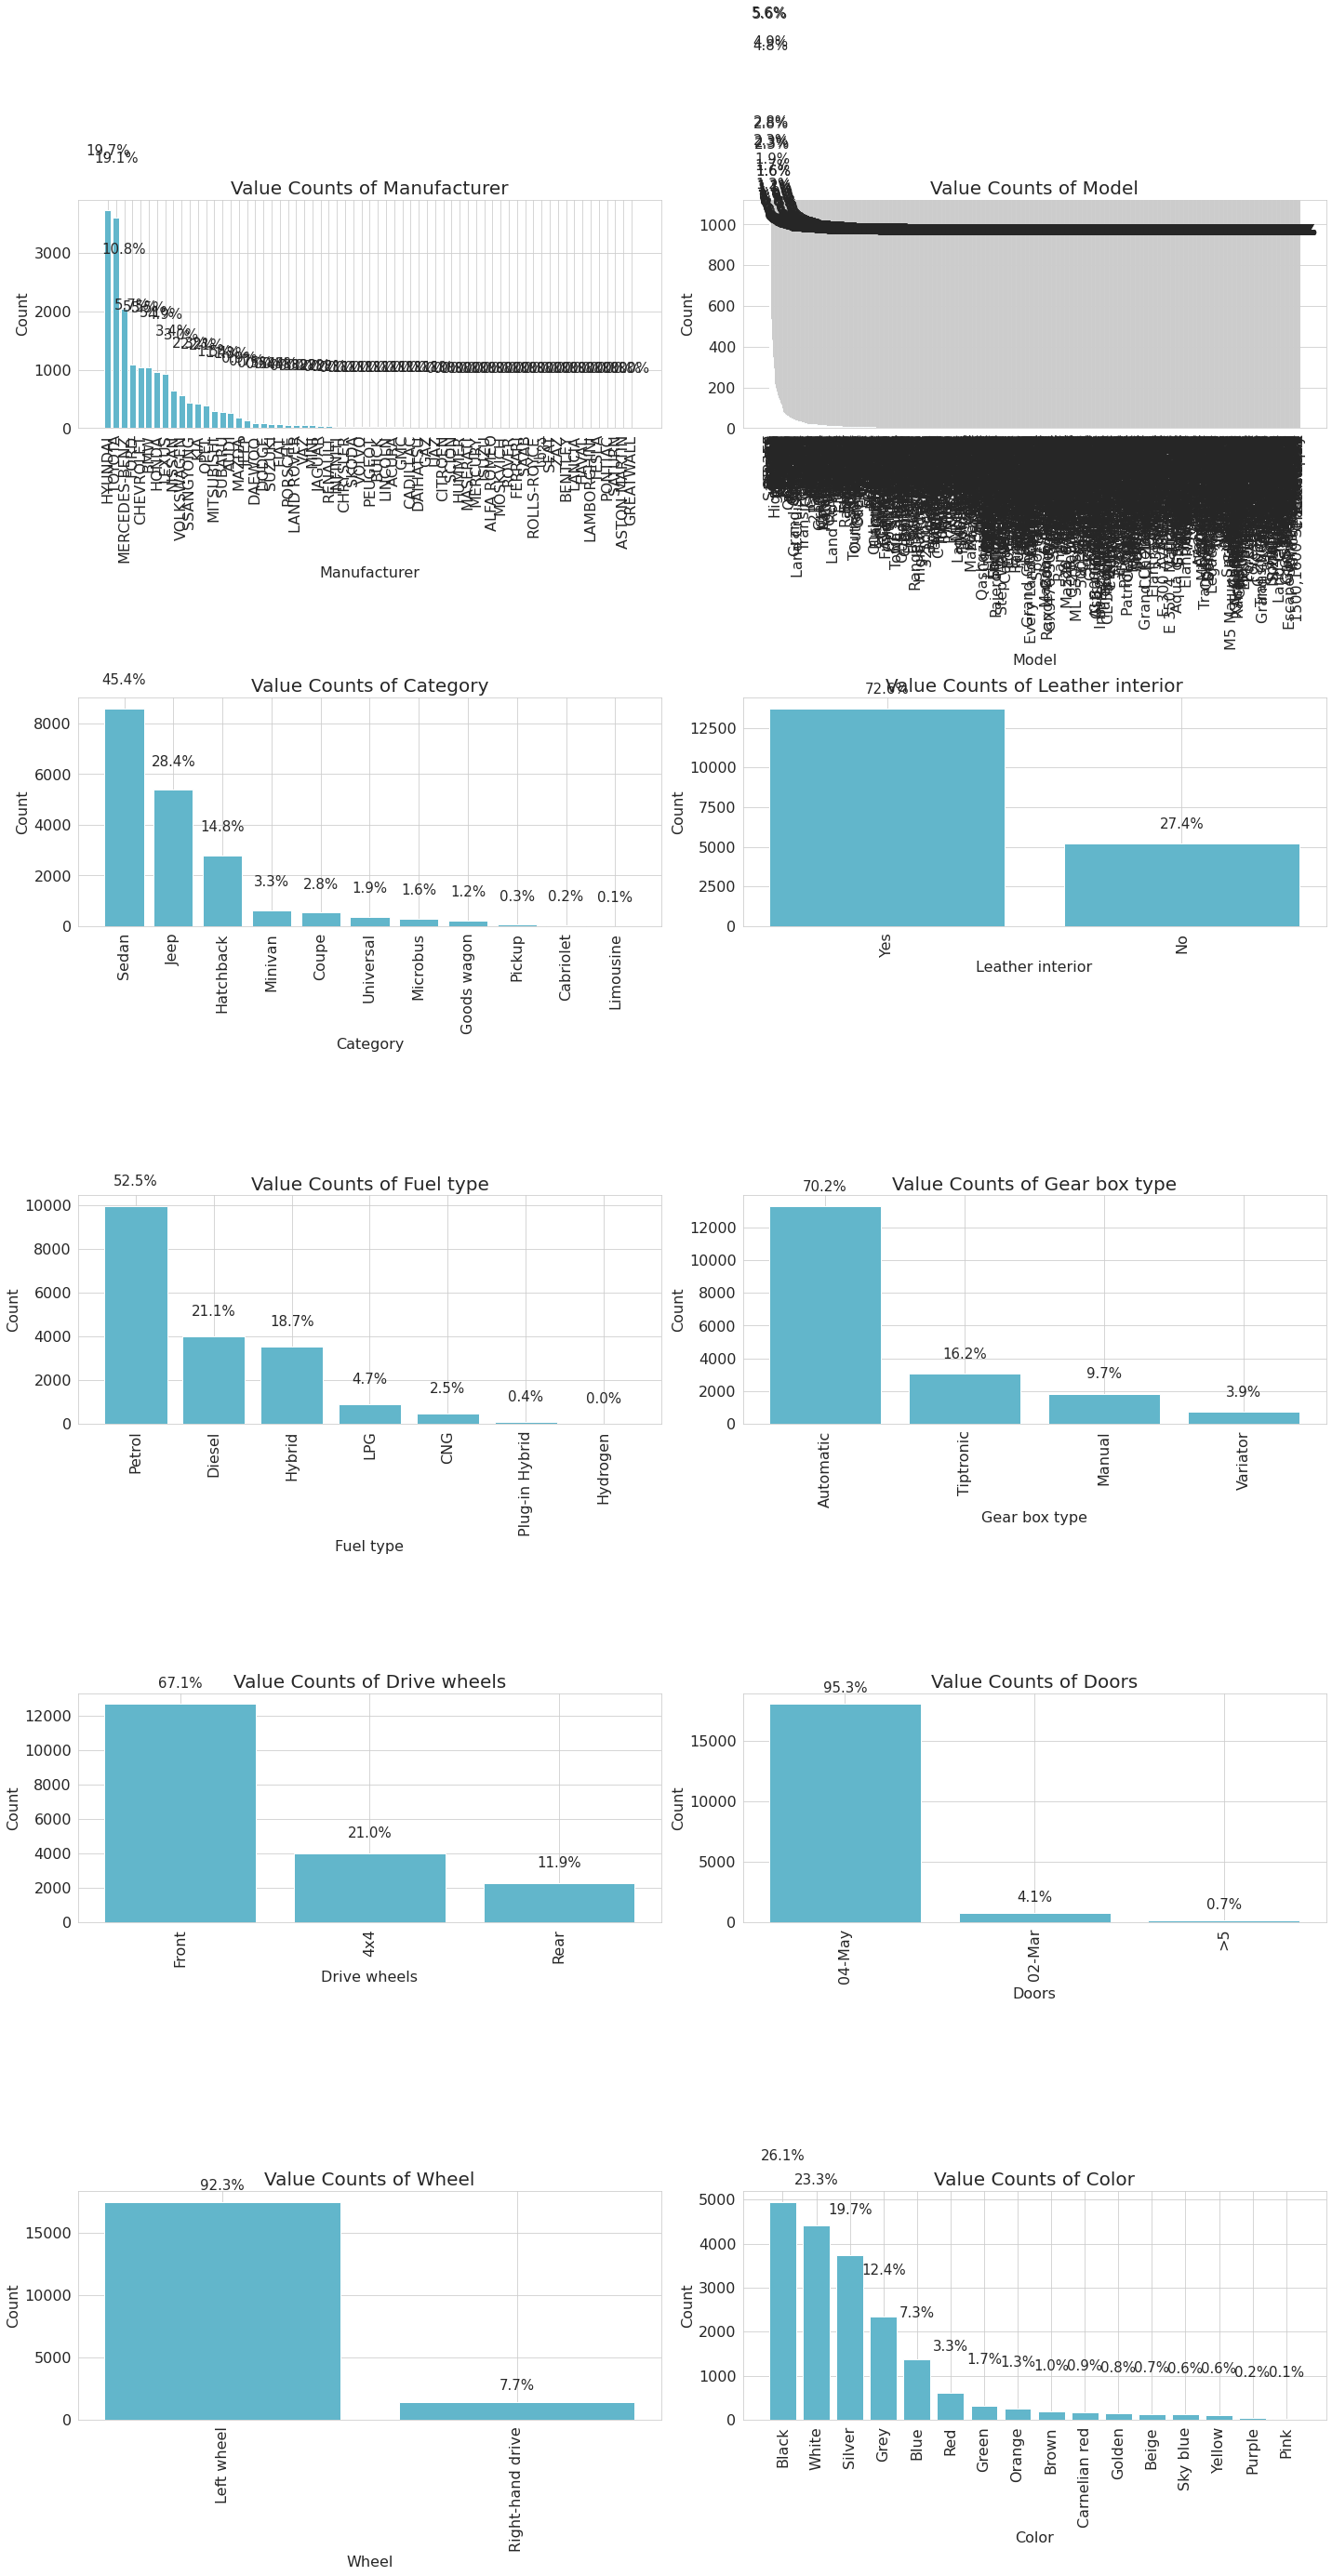

In [237]:

# Create a figure and subplots
fig, axes = plt.subplots(5,2, figsize=(20, 40))
axes = axes.flatten()

# Loop through each column in the dataframe
for i, col in enumerate(object_cols.columns):
    counts = object_cols[col].value_counts()  # Get the value counts for the column
    ax = axes[i]  # Get the subplot
    ax.bar(counts.index, counts.values, color='#62b6cb')  # Create a bar chart of the counts
    ax.set_title(f'Value Counts of {col}', fontsize=20)  # Add a title to the subplot
    ax.set_xlabel(col, fontsize=16)  # Add a label to the x-axis
    ax.set_ylabel('Count', fontsize=16)  # Add a label to the y-axis
    ax.set_xticklabels(counts.index, rotation=90);
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
     # Add percentage labels to the bars
    for j, count in enumerate(counts):
        ax.text(j, count+0.05*counts.sum(), f"{count/counts.sum()*100:.1f}%", ha="center",fontsize=15);
    

# Adjust the spacing of the subplots
fig.tight_layout()


# Show the plot
plt.show();

>*Manufacturer and model have so many values, but not unique in each row. So retain values of high percentage and replace values of low percentage with other.*

In [126]:
# Manufacturer replace values < 0.01
plant = pd.DataFrame(car_price_new['Manufacturer'].value_counts(normalize=True)).reset_index()
plant_new = plant.rename(columns={'index':'Manufacturer', 'Manufacturer':'Percentage'})
print(plant_new)
print('there are', len(plant_new.loc[plant_new['Percentage'] < 0.01,:]), 'Manufacturers of < 0.01')
# Model < 0.01
model = pd.DataFrame(car_price_new['Model'].value_counts(normalize=True)).reset_index()
model_new = model.rename(columns={'index':'Model', 'Model':'Percentage'})
print(model_new)
print('there are', len(model_new.loc[model_new['Percentage'] < 0.01,:]), 'MODELS of < 0.01')


     Manufacturer  Percentage
0         HYUNDAI    0.197051
1          TOYOTA    0.190552
2   MERCEDES-BENZ    0.107958
3            FORD    0.057493
4       CHEVROLET    0.055327
..            ...         ...
60          TESLA    0.000053
61        PONTIAC    0.000053
62         SATURN    0.000053
63   ASTON MARTIN    0.000053
64      GREATWALL    0.000053

[65 rows x 2 columns]
there are 49 Manufacturers of < 0.01
                       Model  Percentage
0                      Prius    0.056489
1                     Sonata    0.056383
2                      Camry    0.049091
3                    Elantra    0.048087
4                      E 350    0.028218
...                      ...         ...
1585  1500,1600 Schtufenheck    0.000053
1586                   E 420    0.000053
1587            C 250 luxury    0.000053
1588            Passat sport    0.000053
1589            Prius C aqua    0.000053

[1590 rows x 2 columns]
there are 1571 MODELS of < 0.01


In [127]:
# define list of Manufacture and Model values accounting for less than 0.01
plant_replace = list(plant_new.loc[plant_new['Percentage'] < 0.01,:]['Manufacturer'])
model_replace = list(model_new.loc[model_new['Percentage'] < 0.01,:]['Model'])

# Define function of replacing values < 0.01
def replace_value_less(df: pd.DataFrame) -> Tuple[Type[pd.Series], Type[pd.Series]]:
  df['Manufacturer'] = df['Manufacturer'].replace(plant_replace, 'others')
  df['Model'] = df['Model'].replace(model_replace, 'others')
  return df['Manufacturer'].value_counts(), df['Model'].value_counts()

# Execution
replace_value_less(car_price_new)


<ipython-input-127-8dc71b4bfb01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'] = df['Manufacturer'].replace(plant_replace, 'others')
<ipython-input-127-8dc71b4bfb01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = df['Model'].replace(model_replace, 'others')


(HYUNDAI          3729
 TOYOTA           3606
 MERCEDES-BENZ    2043
 others           1204
 FORD             1088
 CHEVROLET        1047
 BMW              1036
 HONDA             960
 LEXUS             927
 NISSAN            645
 VOLKSWAGEN        571
 SSANGYONG         439
 KIA               417
 OPEL              396
 MITSUBISHI        288
 SUBARU            274
 AUDI              254
 Name: Manufacturer, dtype: int64, others        10046
 Prius          1069
 Sonata         1067
 Camry           929
 Elantra         910
 E 350           534
 Santa FE        527
 FIT             444
 H1              435
 Tucson          426
 X5              351
 Aqua            319
 Fusion          295
 Cruze           295
 Optima          230
 GX 460          223
 Highlander      216
 Transit         208
 Jetta           201
 ML 350          199
 Name: Model, dtype: int64)

>*others values of Manufactuerer and Model are total of 1204 and 10046*

<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-236-f62a80d9f7d1>:1

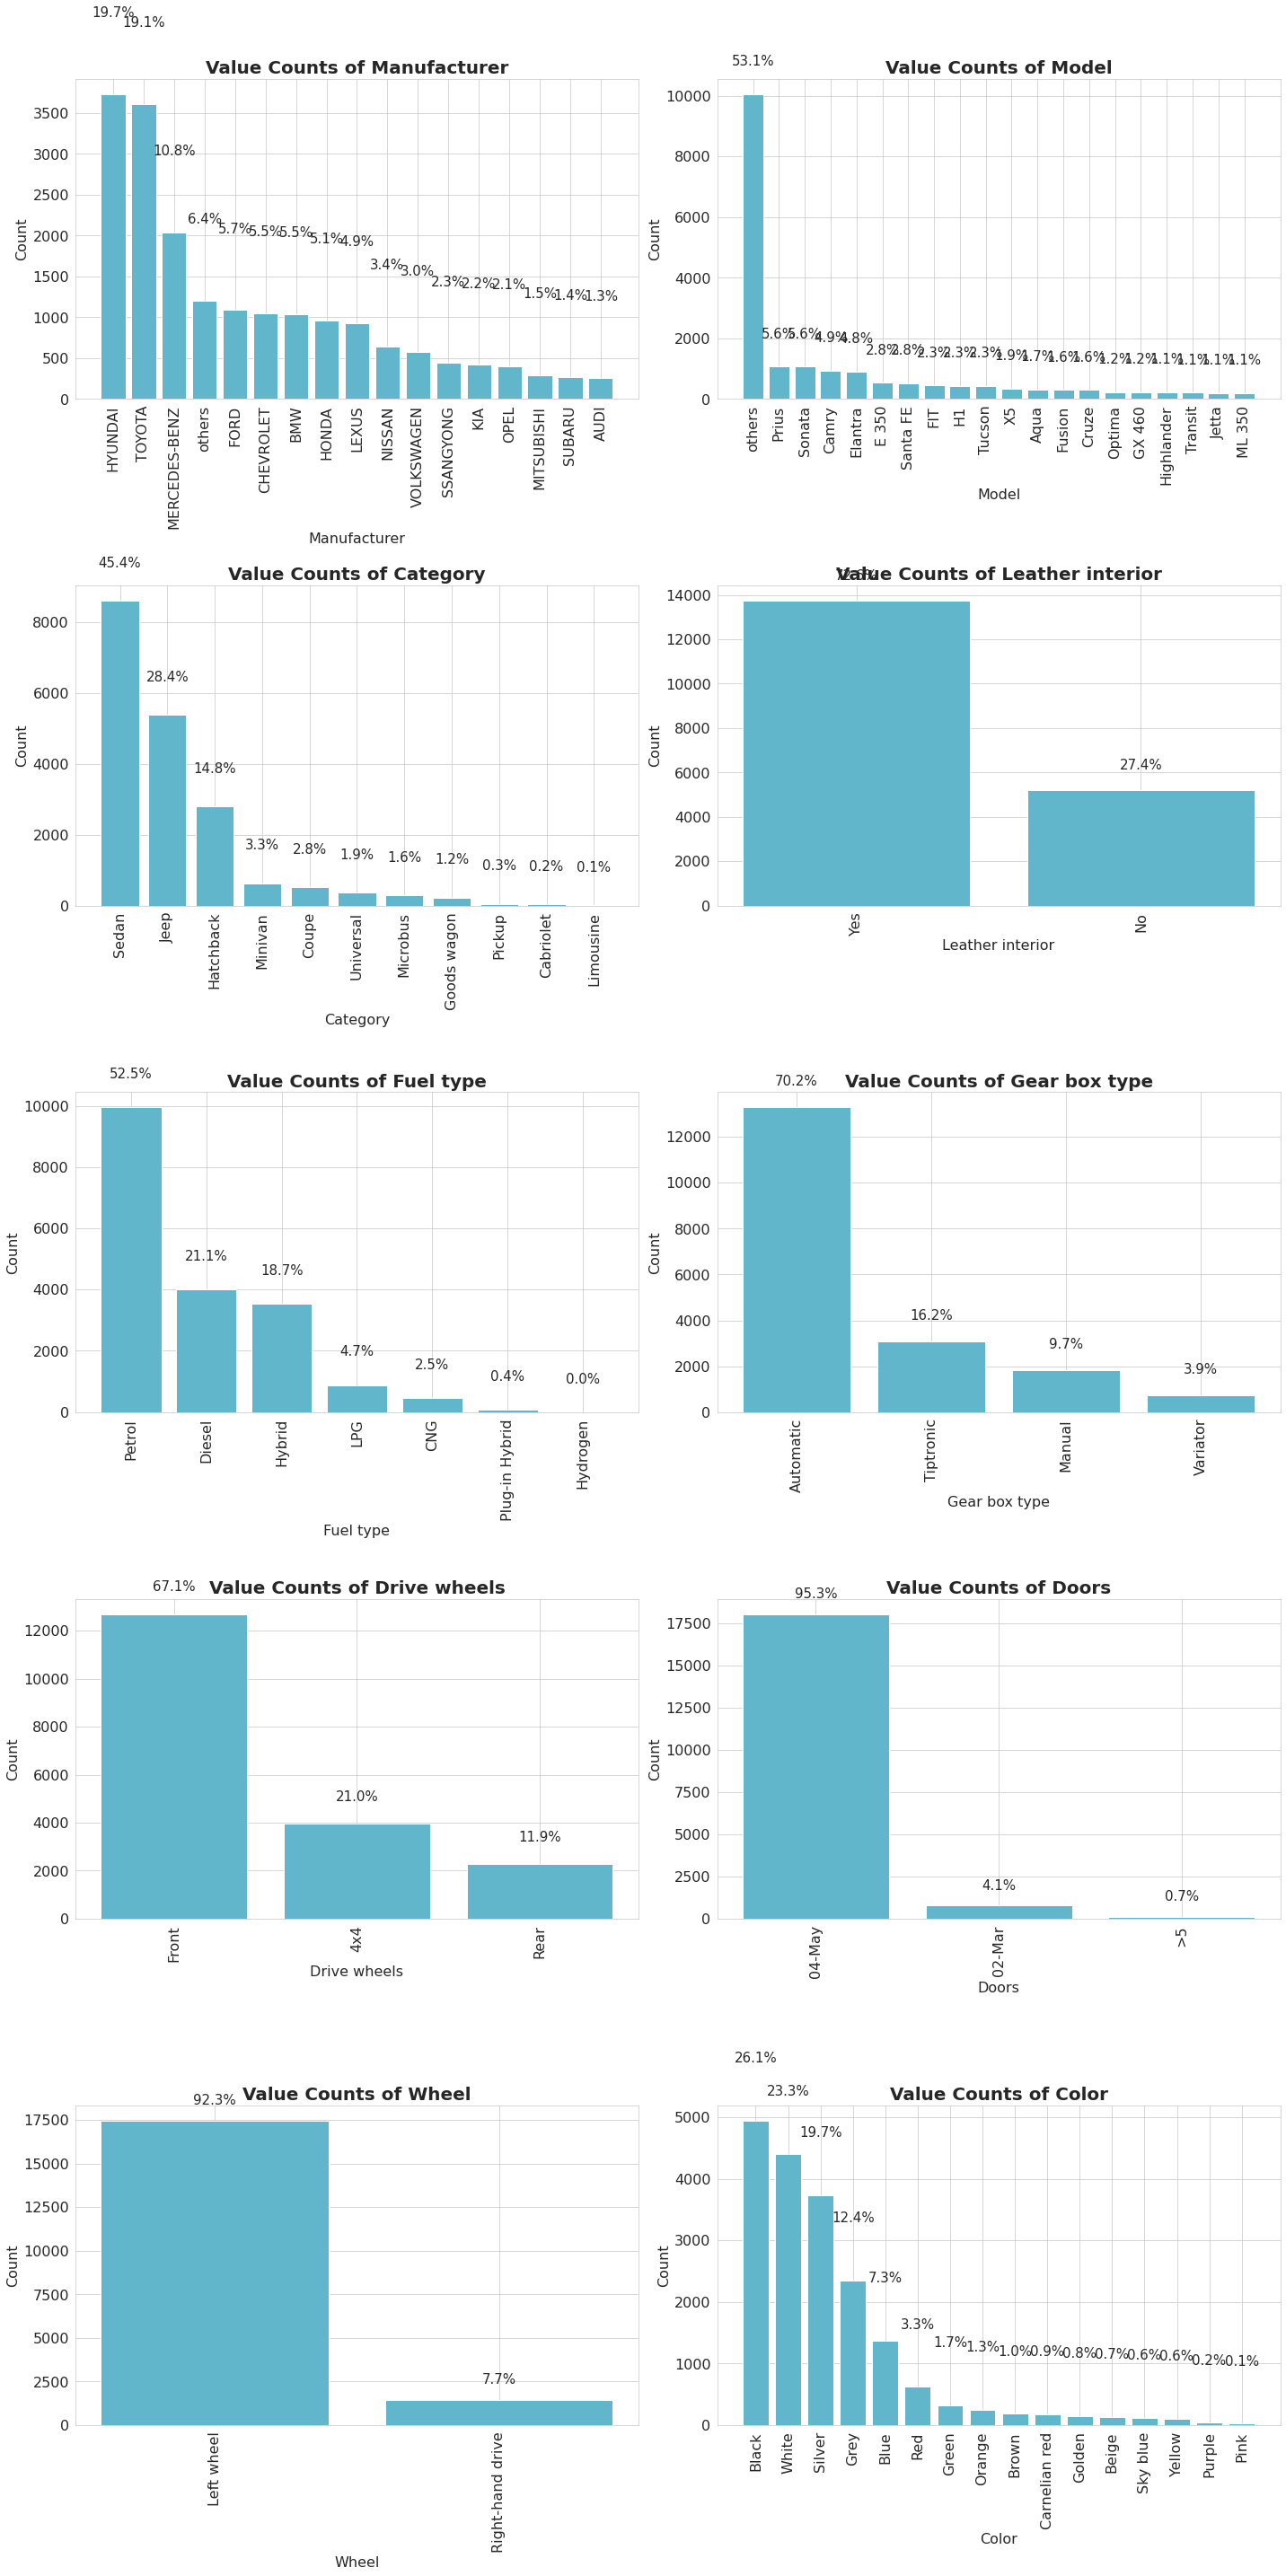

In [236]:
# Create a figure and subplots
fig, axes = plt.subplots(5,2, figsize=(20, 40))
axes = axes.flatten()
object_cols2 = car_price_new.select_dtypes(include='object')

# Loop through each column in the dataframe
for i, col in enumerate(object_cols2.columns):
    counts = object_cols2[col].value_counts()  # Get the value counts for the column
    ax = axes[i]  # Get the subplot
    ax.bar(counts.index, counts.values, color='#62b6cb')  # Create a bar chart of the counts
    ax.set_title(f'Value Counts of {col}', fontsize=20, fontweight='bold')  # Add a title to the subplot
    ax.set_xlabel(col, fontsize=16)  # Add a label to the x-axis
    ax.set_ylabel('Count', fontsize=16)  # Add a label to the y-axis
    ax.set_xticklabels(counts.index, rotation=90);
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
     # Add percentage labels to the bars
    for j, count in enumerate(counts):
        ax.text(j, count+0.05*counts.sum(), f"{count/counts.sum()*100:.1f}%", ha="center",fontsize=15);
    

# Adjust the spacing of the subplots
fig.tight_layout()


# Show the plot
plt.show();

>*Bar charts of Manufacturer and Model are more descriptive and clear*

##### 2.4 Statistical Description of numerical cols

In [129]:

# Check statistics  of numerical cols
num_cols = car_price_new.select_dtypes(include=['int','float']).drop(columns='ID')
num_cols.describe().round(2)

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,18924.00,18924.00,18924.00,18924.00,1.892400e+04,18924.00,18924.00
mean,18587.44,632.89,2010.91,2.31,1.555373e+06,4.58,6.57
std,192135.63,568.27,5.67,0.88,4.880221e+07,1.20,4.32
min,1.00,0.00,1939.00,0.00,0.000000e+00,1.00,0.00
25%,5331.00,0.00,2009.00,1.80,7.019575e+04,4.00,4.00
50%,13172.00,642.00,2012.00,2.00,1.264000e+05,4.00,6.00
75%,22063.00,917.00,2015.00,2.50,1.891198e+05,4.00,12.00
max,26307500.00,11714.00,2020.00,20.00,2.147484e+09,16.00,16.00


>*It's easy to see that Price has a very large outlier of MAX value, plot Boxplot to observe easily of outliers*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

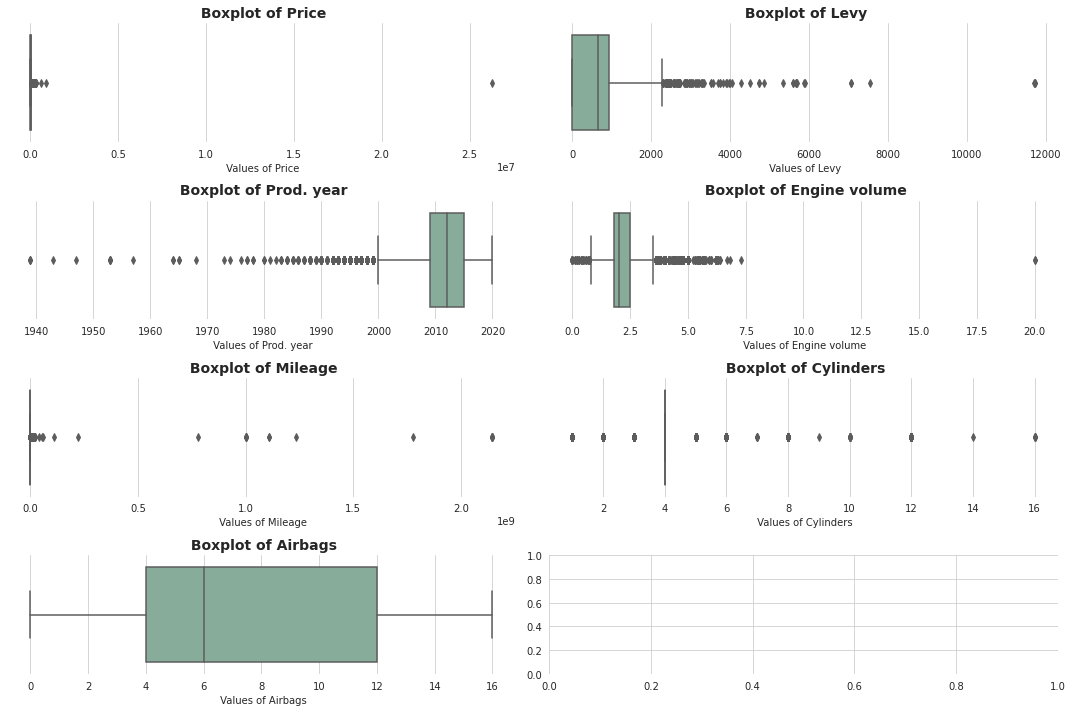

In [235]:
# Create subplots with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
# Use seaborn to set the style
sns.set_style("whitegrid")
# Flatten the subplots array for easier iteration
axs = axs.flatten()

# Loop over each column and plot a separate boxplot
for ax, column in zip(axs, num_cols.columns):
    sns.boxplot(car_price_new[column], ax=ax, color='#81b29a')
    ax.set_title(f" Boxplot of {column}", fontsize=14, fontweight='bold')
    ax.set_xlabel(f" Values of {column}")
    sns.despine(left=True, bottom=True)

# Remove unused subplots
for ax in axs[len(num_cols):]:
    ax.remove()

# Show the plot
plt.tight_layout()
plt.show();

>*Outliers is too much higher values compared to the others values.Check outliers and remove them, If do not remove, model will be bias*

In [131]:

#sns.pairplot(car_price_new[num_cols.columns])

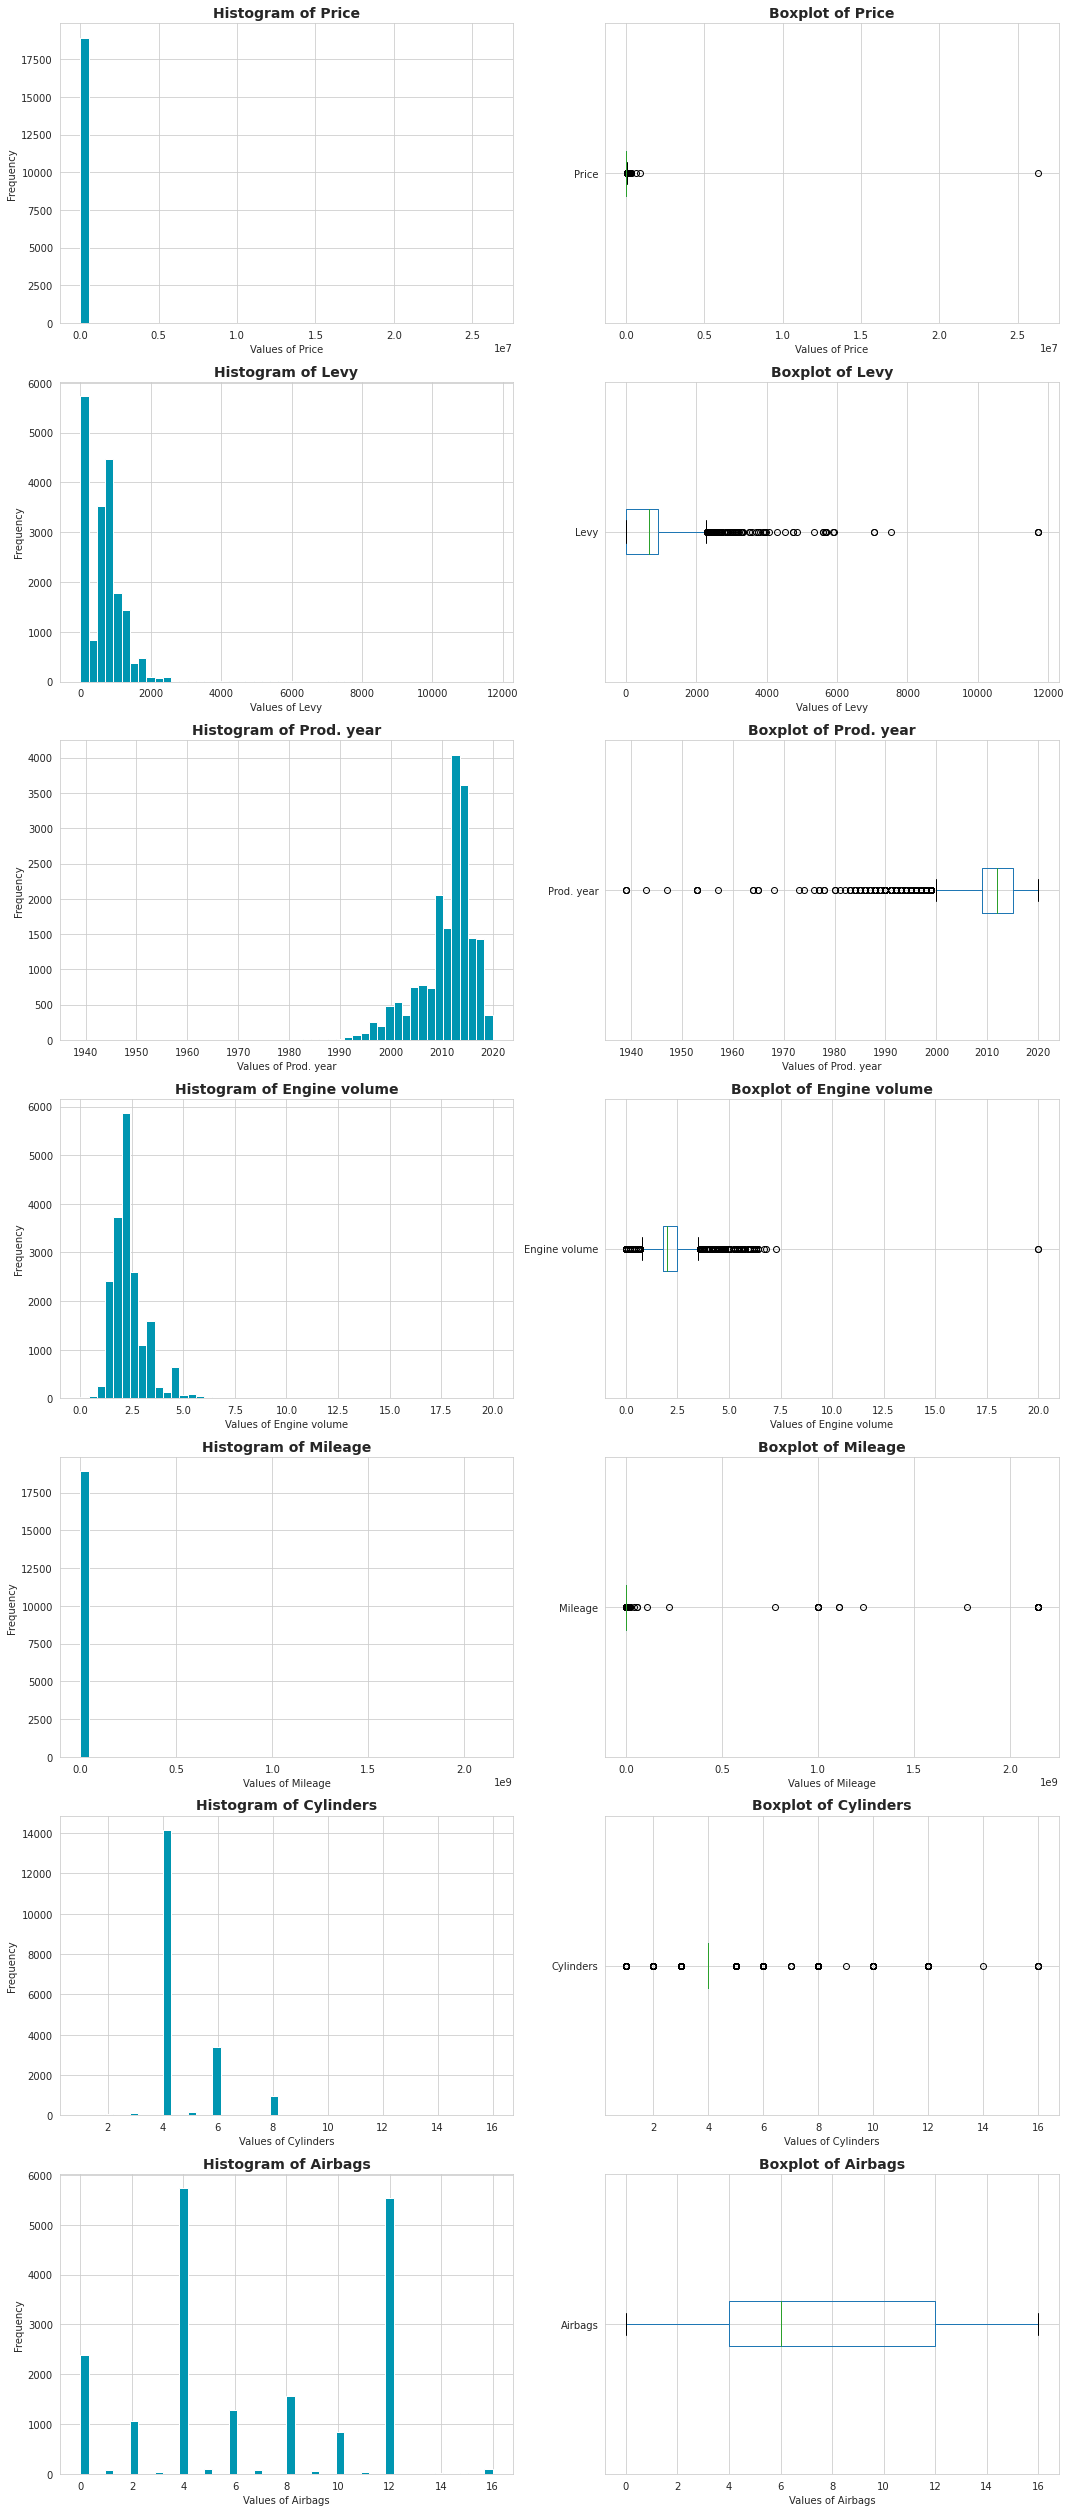

In [132]:

# Create subplots
fig, axs = plt.subplots(7, 2, figsize=(15, 5*7))

# Loop over each column and plot a histogram and boxplot                                                                                             
for i, column in enumerate(num_cols.columns):
    # Histogram
    axs[i, 0].hist(car_price_new[column], bins=50, color='#0096b1')
    axs[i, 0].set_title(f"Histogram of {column}", fontsize=14, fontweight='bold')
    axs[i, 0].set_xlabel(f"Values of {column}")
    axs[i, 0].set_ylabel("Frequency")
    
    # Boxplot
    car_price_new[column].to_frame().boxplot(ax=axs[i, 1], vert=False)
    axs[i, 1].set_title(f"Boxplot of {column}", fontsize=14, fontweight='bold')
    axs[i, 1].set_xlabel(f"Values of {column}")
    axs[i, 1].set_ylabel("");
    
# Adjust subplot spacing
fig.tight_layout()
plt.show();

>*The skewness of Histogram of columns above is s0 large. Remove just  outliers with high values to decrease skewness*

In [133]:
# Locate outliers of high values
outlier_price = car_price_new.loc[ (car_price_new['Price'] > car_price_new['Price'].quantile(0.95)) | (car_price_new['Price']<50),:]['Price'].sort_values()
outlier_Levy = car_price_new.loc[ car_price_new['Levy'] > car_price_new['Levy'].quantile(0.9988),:]['Levy'].sort_values()
outlier_Enginevolume = car_price_new.loc[ car_price_new['Engine volume'] > car_price_new['Engine volume'].quantile(0.9997),:]['Engine volume'].sort_values()
outlier_Mileage = car_price_new.loc[ car_price_new['Mileage'] > car_price_new['Mileage'].quantile(0.95),:]['Mileage'].sort_values()
outlier_Cylinders = car_price_new.loc[ car_price_new['Cylinders'] > car_price_new['Cylinders'].quantile(0.999),:]['Cylinders'].sort_values()
outlier_year = car_price_new.loc[ car_price_new['Prod. year'] < car_price_new['Prod. year'].quantile(0.0008),:]['Prod. year'].sort_values()
outlier_price,outlier_Levy,outlier_Enginevolume,outlier_Mileage,outlier_Cylinders,outlier_year



(7815            1
 16992           1
 753             3
 9730            3
 5890            3
            ...   
 9367       297930
 5008       308906
 1225       627220
 8541       872946
 16983    26307500
 Name: Price, Length: 1153, dtype: int64, 13973     3965
 11413     3989
 14892     4057
 8887      4283
 1571      4508
 9222      4736
 17495     4741
 19048     4860
 3639      5332
 2357      5603
 17777     5603
 8160      5666
 14676     5679
 2323      5679
 17767     5681
 5367      5877
 5529      5908
 2159      7058
 3994      7063
 17117     7536
 18957    11706
 18984    11714
 115      11714
 Name: Levy, dtype: int64, 1086      6.7
 4722      6.8
 5367      7.3
 2357     20.0
 17777    20.0
 Name: Engine volume, dtype: float64, 1686         320582
 7555         320704
 14057        320899
 19127        321037
 13812        321269
             ...    
 6157     2147483647
 19167    2147483647
 2278     2147483647
 12734    2147483647
 11901    2147483647
 Name: Mileag

>*it's crucial to drop outliers because outliers affect heavily on how model is formulated based on variables*

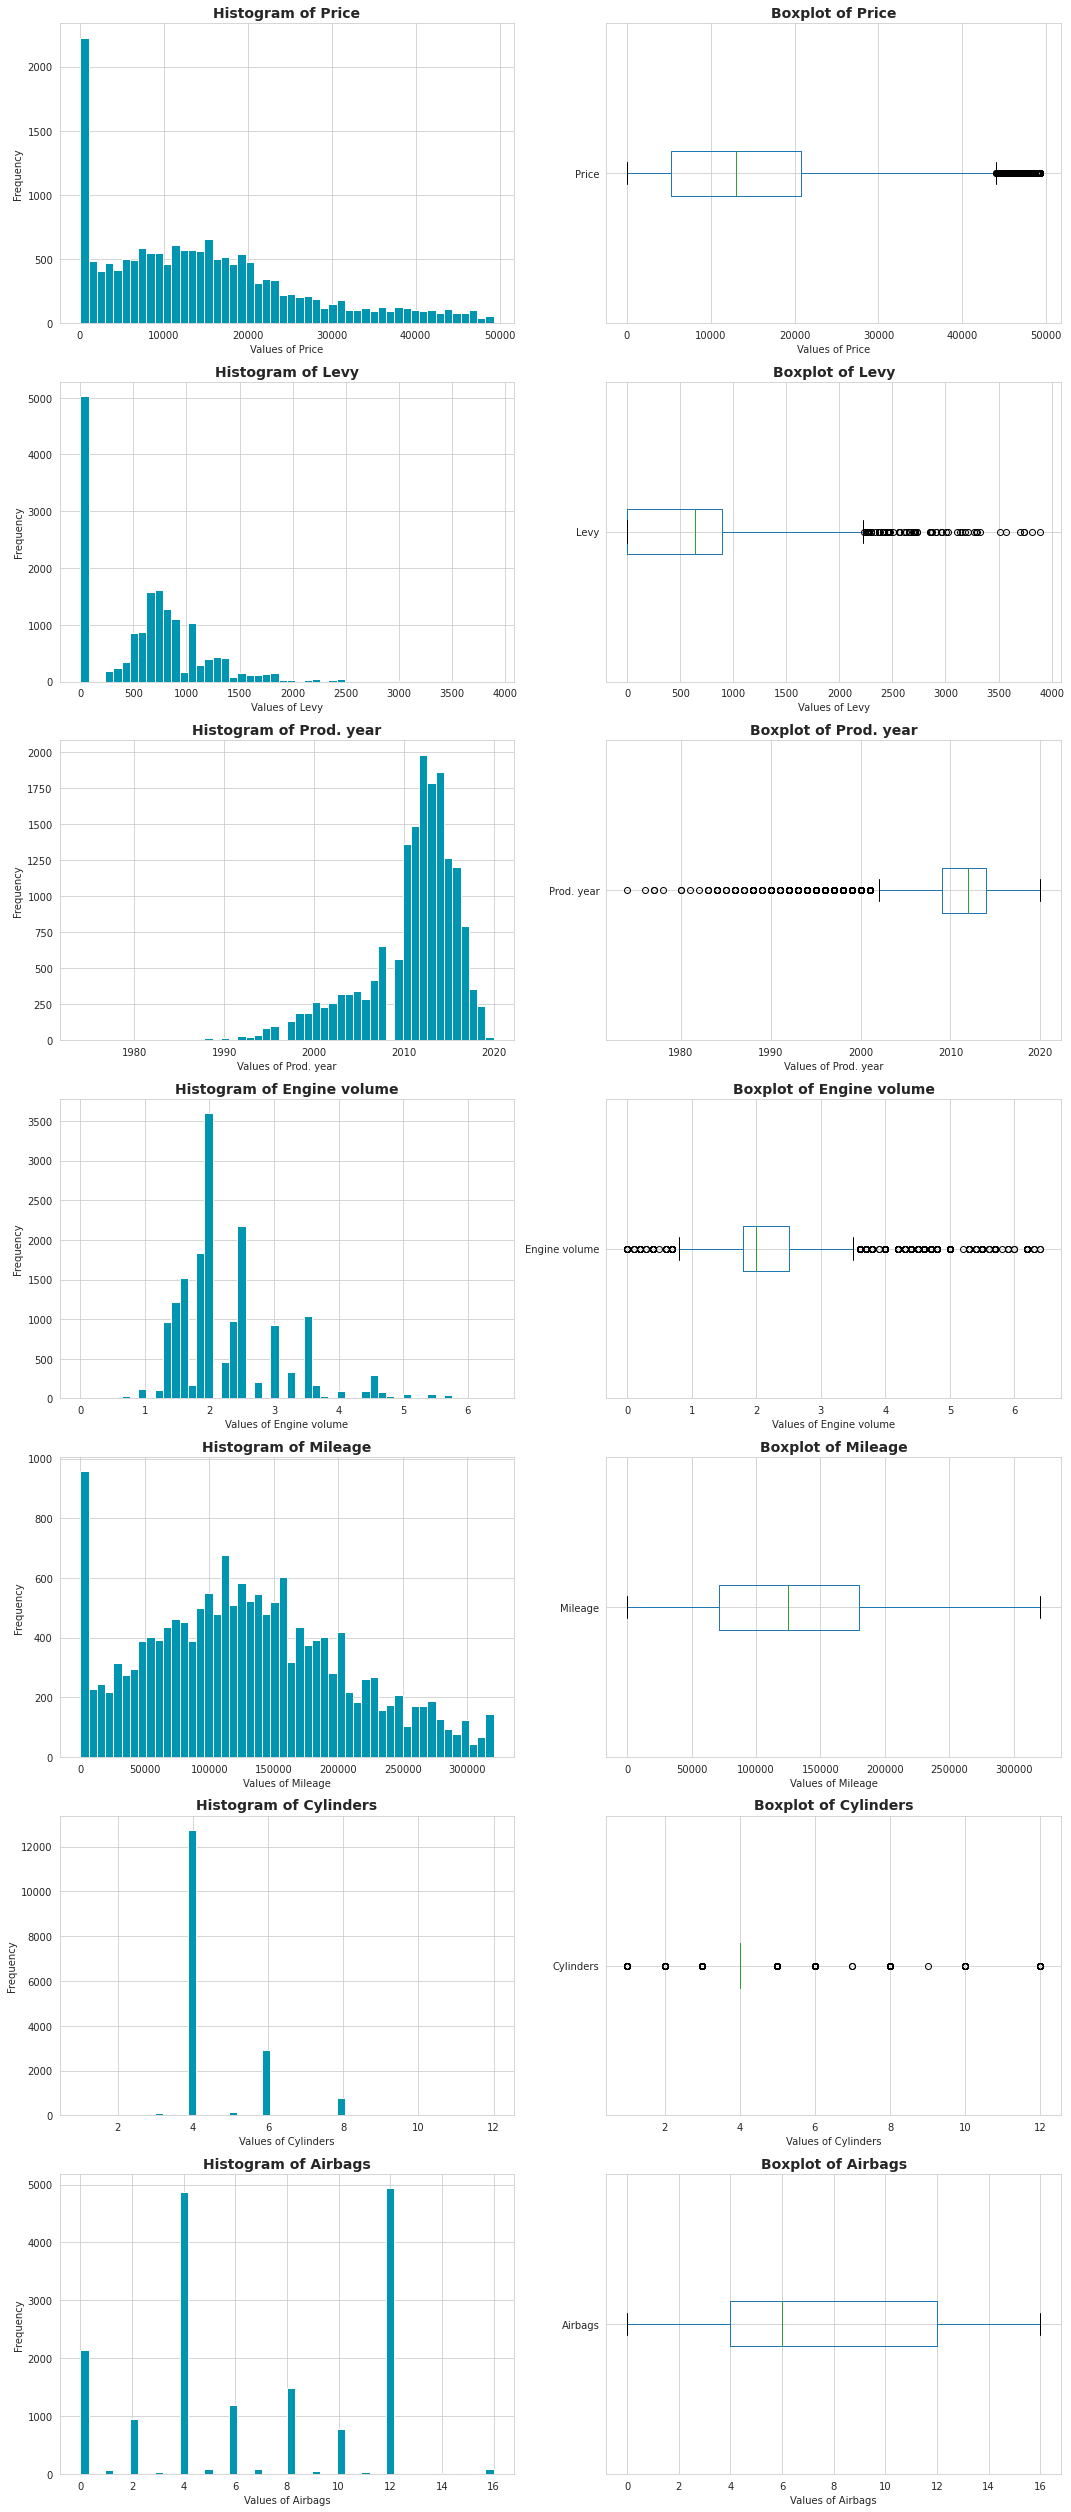

In [134]:
# Synthesize index of outliers to remove
outlier_list=list(set(outlier_price.index.to_list() + outlier_Levy.index.to_list() + outlier_Enginevolume.index.to_list() + outlier_Mileage.index.to_list() + outlier_Cylinders.index.to_list() + outlier_year.index.to_list()))

# Define function to drop outliers
def drop_outlier(df: pd.DataFrame) -> pd.DataFrame:
  df1 = df.drop(outlier_list)
  return df1
# Drop outliers
car_price_new1 = drop_outlier(car_price_new)

# Create subplots
fig, axs = plt.subplots(7, 2, figsize=(15, 5*7))

# Loop over each column and plot a histogram and boxplot                                                                                             
for i, column in enumerate(num_cols.columns):
    # Histogram
    axs[i, 0].hist(car_price_new1[column], bins=50, color='#0096b1')
    axs[i, 0].set_title(f"Histogram of {column}", fontsize=14, fontweight='bold')
    axs[i, 0].set_xlabel(f"Values of {column}")
    axs[i, 0].set_ylabel("Frequency")
    
    # Boxplot
    car_price_new1[column].to_frame().boxplot(ax=axs[i, 1], vert=False)
    axs[i, 1].set_title(f"Boxplot of {column}", fontsize=14, fontweight='bold')
    axs[i, 1].set_xlabel(f"Values of {column}")
    axs[i, 1].set_ylabel("");
    
# Adjust subplot spacing
fig.tight_layout()
plt.show();



>*Distribution of numeric columns is clearer, but there're still ouliers. Retain these outliers of values of not too much high.*

##### 2.5 Overview

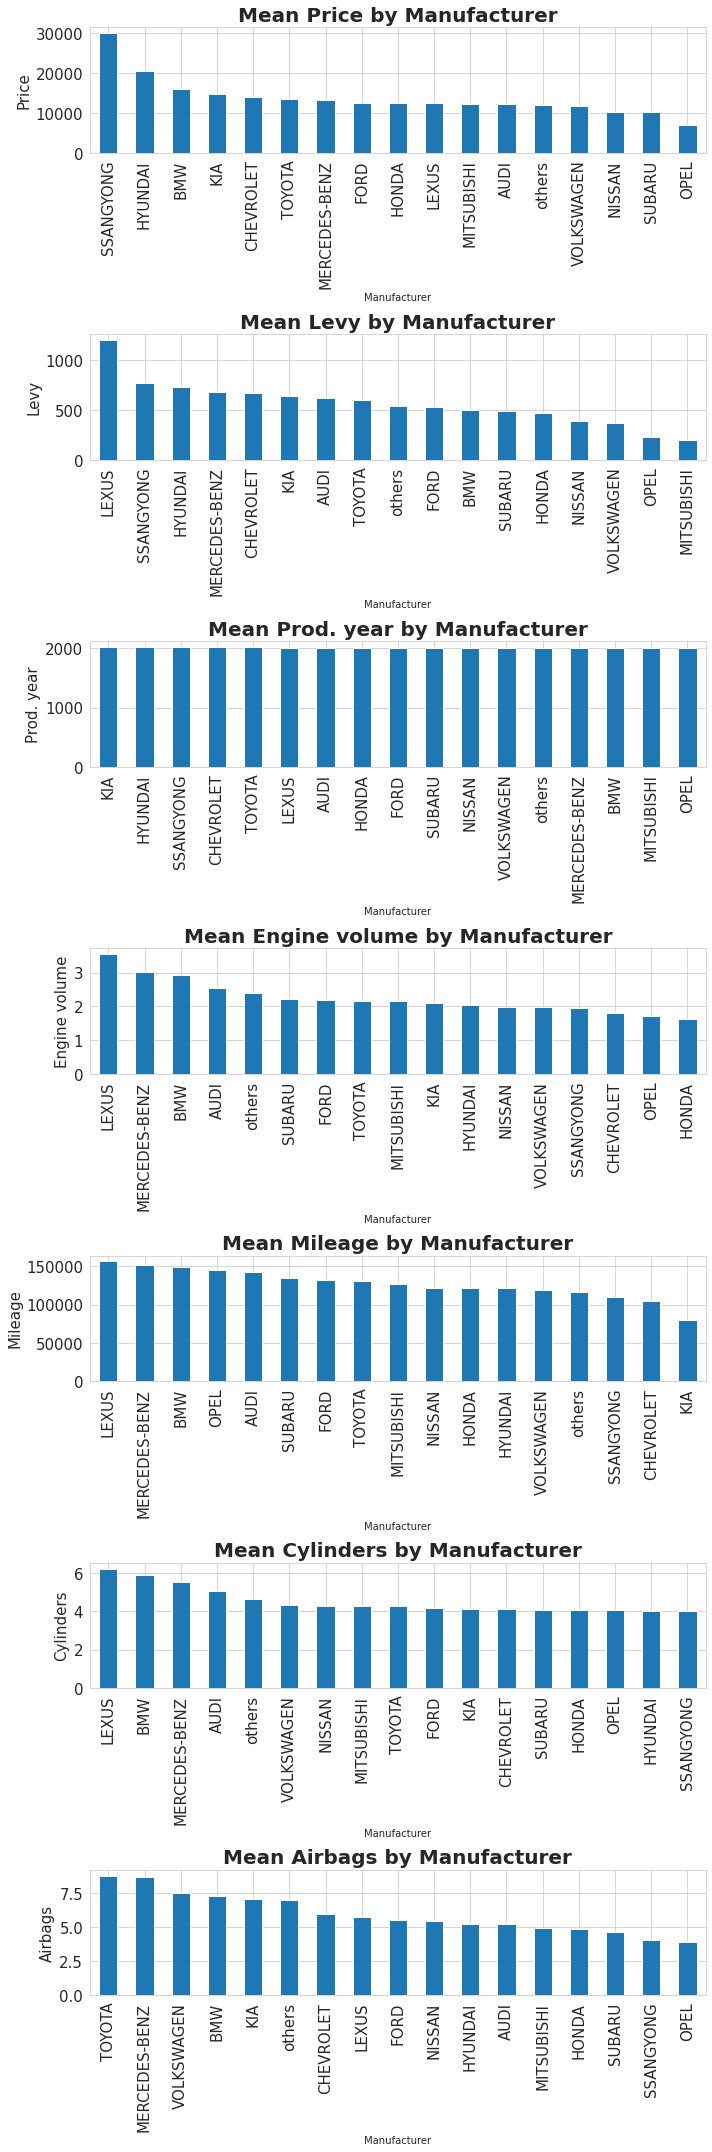

In [135]:

# Group data by Manufacturer and calculate means for all columns
means = car_price_new1.drop(columns='ID').groupby('Manufacturer').mean()

# Create subplots with multiple axes
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 30))  # Adjust the width and height as needed

# Flatten the axs array for ease of indexing
axs = axs.ravel()

# Loop through each column and plot in a separate subplot
for i, col in enumerate(means.columns):
    means[col].sort_values(ascending=False).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Mean {} by Manufacturer'.format(col),fontsize='20', fontweight='bold')
    axs[i].set_ylabel(col, fontsize='15')
    axs[i].tick_params(axis = 'x', labelsize=15)
    axs[i].tick_params(axis = 'y', labelsize=15)
    

# Add spacing between subplots
fig.tight_layout()

# Show the plot
plt.show();


>*Bar charts of mean of Price and Levy show that Top 2 of boths are SSANGOYONG and LEXUS. This means that Cars of high price will bear high Levy. Bar chart of mean of Pro.year shows that cars were produced in every year evenly.*

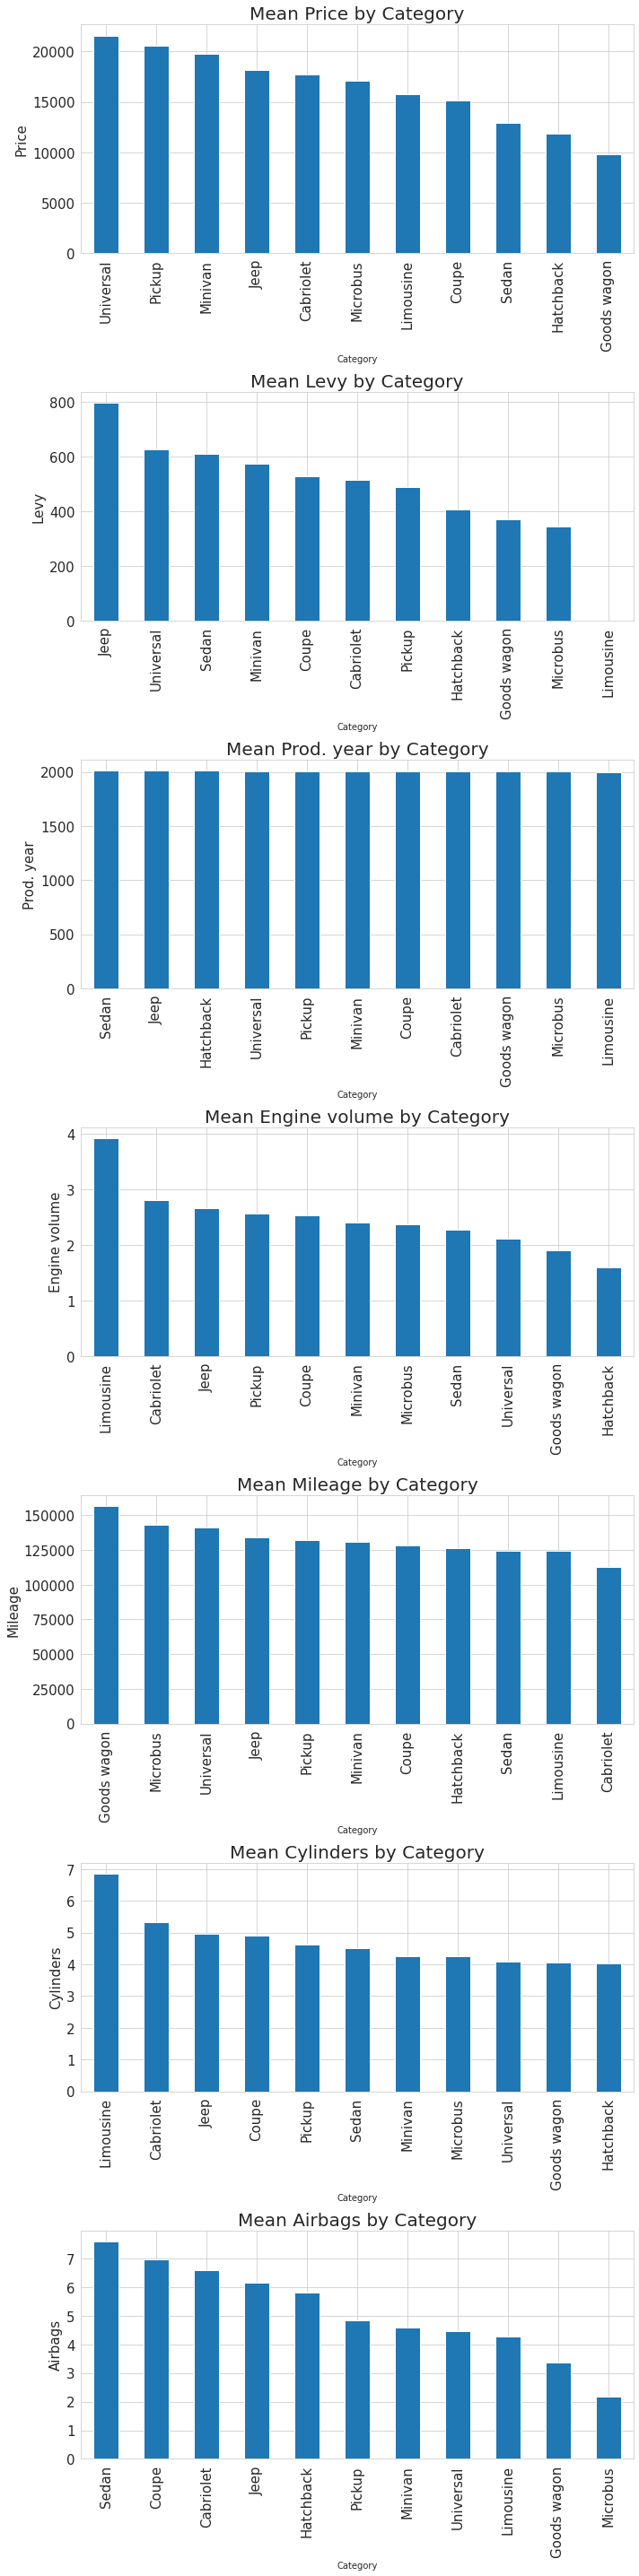

In [136]:
# Group data by Category and calculate means for all columns
means = car_price_new1.drop(columns='ID').groupby('Category').mean()

# Create subplots with multiple axes
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 40))  # Adjust the width and height as needed

# Flatten the axs array for ease of indexing
axs = axs.ravel()

# Loop through each column and plot in a separate subplot
for i, col in enumerate(means.columns):
    means[col].sort_values(ascending=False).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Mean {} by Category'.format(col), fontsize='20')
    axs[i].set_ylabel(col, fontsize='15')
    axs[i].tick_params(axis = 'x',labelsize=15)
    axs[i].tick_params(axis = 'y',labelsize=15)
    

# Add spacing between subplots
fig.tight_layout()

# Show the plot
plt.show();


>*Bar chart of mean of Pro.year shows that cars were produced in every year evenly, other bar charts show no specific feature.*


<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Price by leather interior')

Text(0, 0.5, 'Price')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Levy by leather interior')

Text(0, 0.5, 'Levy')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Prod. year by leather interior')

Text(0, 0.5, 'Prod. year')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Engine volume by leather interior')

Text(0, 0.5, 'Engine volume')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Mileage by leather interior')

Text(0, 0.5, 'Mileage')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Cylinders by leather interior')

Text(0, 0.5, 'Cylinders')

<AxesSubplot:xlabel='Leather interior'>

Text(0.5, 1.0, 'Mean Airbags by leather interior')

Text(0, 0.5, 'Airbags')

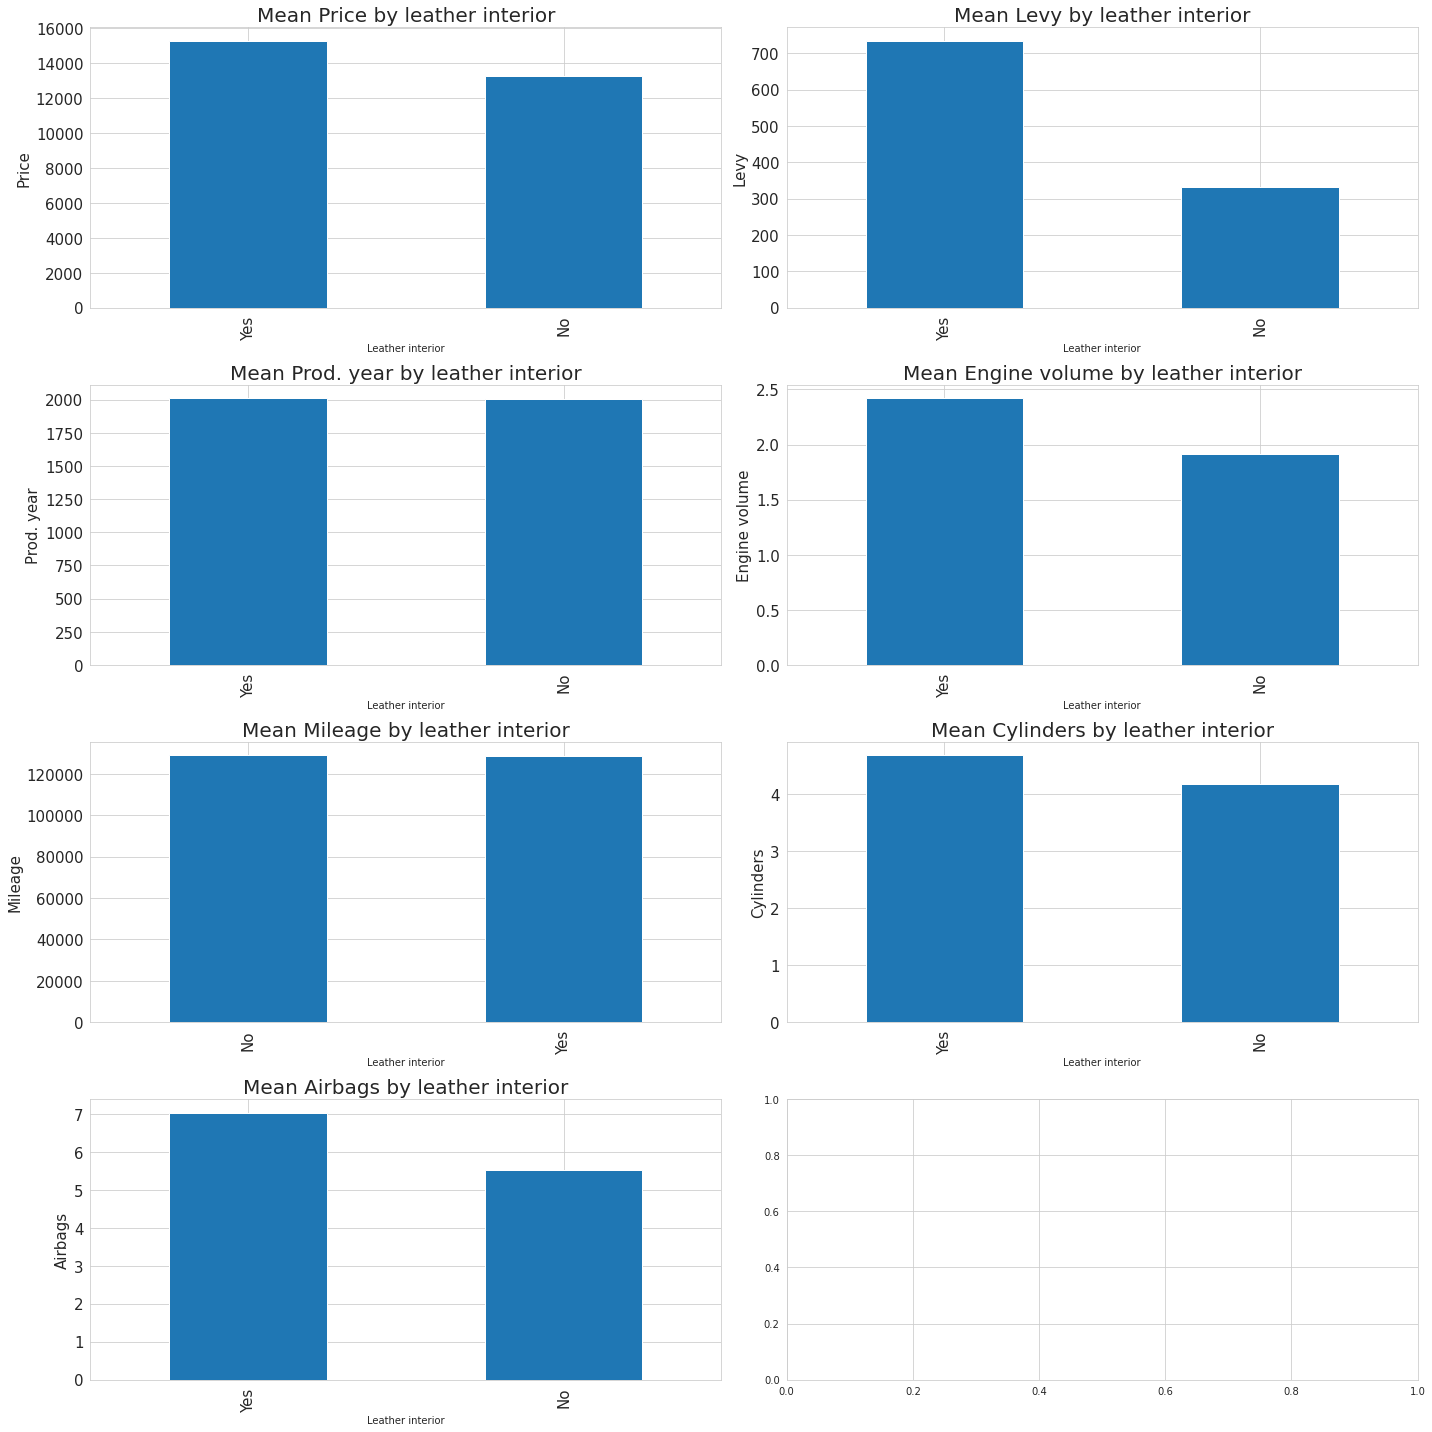

In [137]:
# Group data by Manufacturer and calculate means for all columns
means = car_price_new1.drop(columns='ID').groupby('Leather interior').mean()

# Create subplots with multiple axes
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Adjust the width and height as needed

# Flatten the axs array for ease of indexing
axs = axs.ravel()

# Loop through each column and plot in a separate subplot
for i, col in enumerate(means.columns):
    means[col].sort_values(ascending=False).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Mean {} by leather interior'.format(col),fontsize='20')
    axs[i].set_ylabel(col, fontsize='15')
    axs[i].tick_params(axis = 'x',labelsize=15)
    axs[i].tick_params(axis = 'y',labelsize=15)
    

# Add spacing between subplots
fig.tight_layout()

# Show the plot
plt.show();


>*With Leather Interior, mean of cars of leather Interior is always higher than of car of no leather interior in all columns, this can be understood easily bacause cars of leather interior are certainly more modern and have higher Price, Levy*  

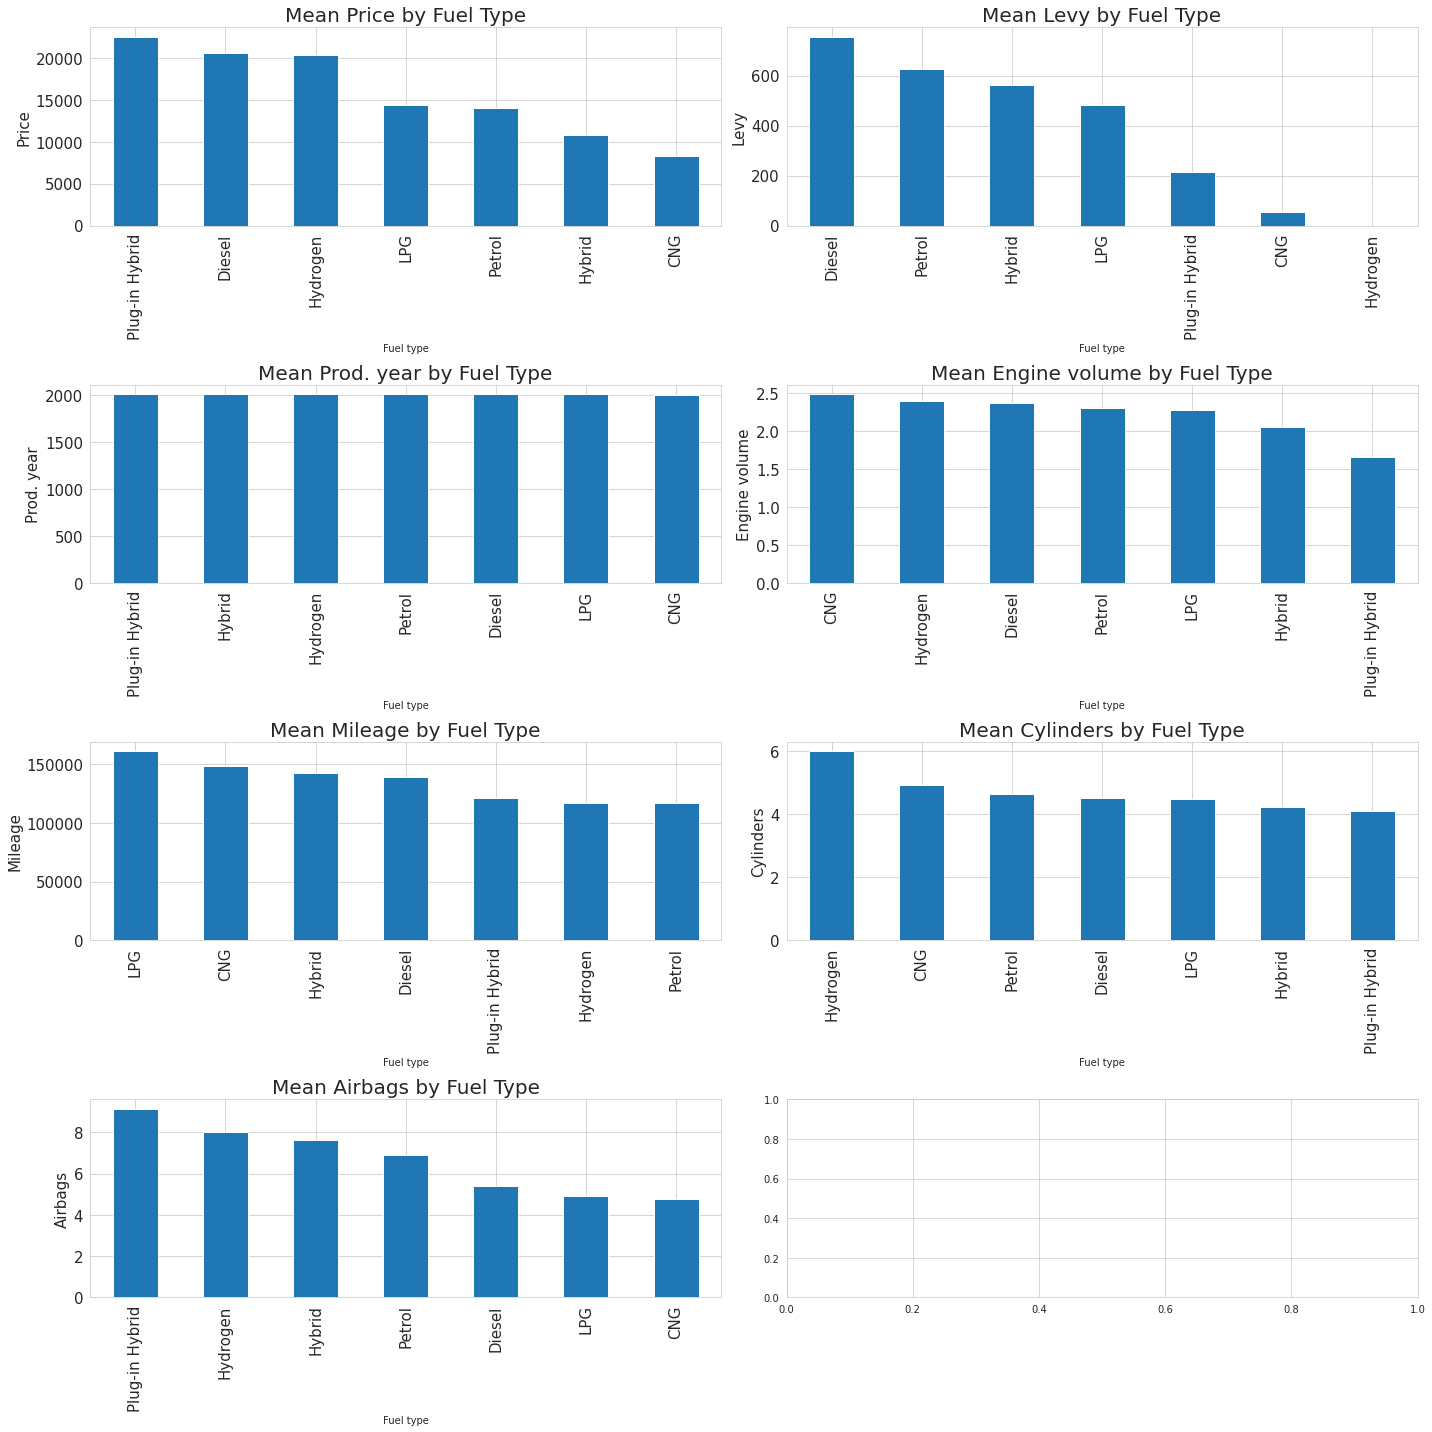

In [138]:
# Group data by Manufacturer and calculate means for all columns
means = car_price_new1.drop(columns='ID').groupby('Fuel type').mean()

# Create subplots with multiple axes
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Adjust the width and height as needed

# Flatten the axs array for ease of indexing
axs = axs.ravel()

# Loop through each column and plot in a separate subplot
for i, col in enumerate(means.columns):
    means[col].sort_values(ascending=False).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Mean {} by Fuel Type'.format(col),fontsize='20')
    axs[i].set_ylabel(col, fontsize='15')
    axs[i].tick_params(axis = 'x',labelsize=15)
    axs[i].tick_params(axis = 'y',labelsize=15)
    

# Add spacing between subplots
fig.tight_layout()

# Show the plot
plt.show();


>*The barcharts of Price and Levy shows that cars of using electric engine have higher price, and cars of fossil fuel have higher levy. it's reasionalbe.*

####3.Data Modelling

#####3.1 Convert to numerical and normalization

In [139]:
# Define a function of convert object cols to numerical cols
def convert_num(df: pd.DataFrame) -> pd.DataFrame:
  df2 = pd.get_dummies(df)
  return df2

# Execution
car_price_num = convert_num(car_price_new1)
print(car_price_num.info())
print(car_price_num.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16811 entries, 0 to 19236
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          16811 non-null  int64  
 1   Price                       16811 non-null  int64  
 2   Levy                        16811 non-null  int64  
 3   Prod. year                  16811 non-null  int64  
 4   Engine volume               16811 non-null  float64
 5   Mileage                     16811 non-null  int64  
 6   Cylinders                   16811 non-null  float64
 7   Airbags                     16811 non-null  int64  
 8   Manufacturer_AUDI           16811 non-null  uint8  
 9   Manufacturer_BMW            16811 non-null  uint8  
 10  Manufacturer_CHEVROLET      16811 non-null  uint8  
 11  Manufacturer_FORD           16811 non-null  uint8  
 12  Manufacturer_HONDA          16811 non-null  uint8  
 13  Manufacturer_HYUNDAI        168

>*Now, there're 93 cols*

In [140]:
# Split columns of dataset into target col and cols of predictors
target_col=['Price']
predictors=list(set(car_price_num.drop(columns='ID').columns)-set(target_col))

# Normalization
def normal_transform(df: pd.DataFrame) -> pd.DataFrame:
  df[predictors] = df[predictors]/df[predictors].max() 
  return  df

# Execution
normal_transform(car_price_num)

# Assigne values for response variable and independent variable 
y = car_price_num[target_col]
x = car_price_num[predictors]

#splits the data into training and test dataset (70%-30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)




,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_AUDI,Manufacturer_BMW,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,0.359271,0.995050,0.546875,0.580261,0.500000,0.7500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44731507,16621,0.261428,0.995545,0.468750,0.598963,0.500000,0.5000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45774419,8467,0.000000,0.993069,0.203125,0.623920,0.333333,0.1250,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45769185,3607,0.221366,0.995545,0.390625,0.527106,0.333333,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,45809263,11726,0.114535,0.997030,0.203125,0.286694,0.333333,0.2500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.000000,0.989604,0.312500,0.935880,0.333333,0.3125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19233,45778856,15681,0.213405,0.995545,0.375000,0.504127,0.333333,0.5000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19234,45804997,26108,0.214689,0.995050,0.312500,0.363012,0.333333,0.2500,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,45793526,5331,0.330765,0.993564,0.312500,0.159904,0.333333,0.2500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(11767, 91)
(5044, 91)


>*Train set of 11767 rows x 91 cols, test set of 5040 rows x 91 cols*

##### 3.2 Linear Regression


In [141]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)  #Ordinary least squares
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:57:49   Log-Likelihood:            -1.7711e+05
No. Observations:               16811   AIC:                         3.544e+05
Df Residuals:                   16729   BIC:                         3.550e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

>*P value are pretty higher, error will be so high. R2 is low, model will not be better*

---



In [142]:
#splits the data into training and test dataset (70%-30%)
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(X_LR_train.shape); print(X_LR_test.shape)


(11767, 91)
(5044, 91)


In [143]:
# Fit on train set
lr = LinearRegression()
lr.fit(X_LR_train, y_LR_train) 

# Predict on train set
pred_train_lr= lr.predict(X_LR_train)

# Predict on test set
pred_test_lr= lr.predict(X_LR_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_lr = np.sqrt(mean_squared_error(y_LR_train, pred_train_lr))
r2_train_lr = r2_score(y_LR_train, pred_train_lr)
mape_train_lr = mean_absolute_percentage_error(y_LR_train, pred_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_LR_test, pred_test_lr))
r2_test_lr = r2_score(y_LR_test, pred_test_lr)
mape_test_lr = mean_absolute_percentage_error(y_LR_train, pred_train_lr)

LinearRegression()

#####3.3 Ridge Regression

In [144]:
# Fit on train set
rr = Ridge(alpha=0.01) # Choose alpha, try some options to see results
rr.fit(x_train, y_train)  

# Predict on train set
pred_train_rr = rr.predict(x_train)

# Predict on test set
pred_test_rr = rr.predict(x_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_rr = np.sqrt(mean_squared_error(y_train, pred_train_rr))
r2_train_rr = r2_score(y_train, pred_train_rr)
mape_train_rr = mean_absolute_percentage_error(y_train, pred_train_rr)

rmse_test_rr = np.sqrt(mean_squared_error(y_test, pred_test_rr))
r2_test_rr = r2_score(y_test, pred_test_rr)
mape_test_rr = mean_absolute_percentage_error(y_test, pred_test_rr)


Ridge(alpha=0.01)

##### 3.4 Lasso Regression

In [145]:
# Fit on train set
model_lasso = Lasso(alpha=0.01) # Try different alpha
model_lasso.fit(x_train, y_train) 

# Predict on train set
pred_train_lasso = model_lasso.predict(x_train) #predict on train set

# Predict on test set
pred_test_lasso = model_lasso.predict(x_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, pred_train_lasso))
r2_train_lasso = r2_score(y_train, pred_train_lasso)
mape_train_lasso = mean_absolute_percentage_error(y_train, pred_train_lasso)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test, pred_test_lasso))
r2_test_lasso = r2_score(y_test, pred_test_lasso)
mape_test_lasso = mean_absolute_percentage_error(y_test, pred_test_lasso)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+11, tolerance: 1.633e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

##### 3.5 Support Vector Machine


In [146]:
# Fit on train set
svm = svm.SVR()
svm.fit(x_train, y_train.values.ravel())

# Predict on train set
pred_train_svm = svm.predict(x_train) #predict on train set

# Predict on test set
pred_test_svm = svm.predict(x_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_svm = np.sqrt(mean_squared_error(y_train, pred_train_svm))
r2_train_svm = r2_score(y_train, pred_train_svm)
mape_train_svm = mean_absolute_percentage_error(y_train, pred_train_svm)

rmse_test_svm = np.sqrt(mean_squared_error(y_test, pred_test_svm))
r2_test_svm = r2_score(y_test, pred_test_svm)
mape_test_svm = mean_absolute_percentage_error(y_test, pred_test_svm)

SVR()

##### 3.6 Decision Tree Regression


In [147]:
# Fit on train set
tree = DecisionTreeRegressor(random_state = 0) #create model
tree.fit(x_train, y_train)

# Predict on train set
pred_train_tree = tree.predict(x_train) 

# Predict on test set
pred_test_tree = tree.predict(x_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_tree = np.sqrt(mean_squared_error(y_train, pred_train_tree))
r2_train_tree = r2_score(y_train, pred_train_tree)
mape_train_tree = mean_absolute_percentage_error(y_train, pred_train_tree)

rmse_test_tree = np.sqrt(mean_squared_error(y_test, pred_test_tree))
r2_test_tree = r2_score(y_test, pred_test_tree)
mape_test_tree = mean_absolute_percentage_error(y_test, pred_test_tree)

DecisionTreeRegressor(random_state=0)

##### 3.7 Random forest

In [148]:
# Fit on train set
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)

# Predict on train set
pred_train_rf = rf.predict(x_train) 

# Predict on test set
pred_test_rf = rf.predict(x_test)

# Evaluate the performance of model root mean squared error(RMSE), mean absolute percentage error(MAPE), and goodness of fit (r2).
rmse_train_rf = np.sqrt(mean_squared_error(y_train, pred_train_rf))
r2_train_rf = r2_score(y_train, pred_train_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, pred_train_rf)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, pred_test_rf)) 
r2_test_rf = r2_score(y_test, pred_test_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, pred_test_rf)

<ipython-input-148-da2287ccef98>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)


array([ 4080.255, 23335.19 , 15877.52 , ..., 18882.87 , 20262.59 ,
       11358.81 ])

#### 4.Model Comparision and error analysis


#####4.1 Model Comparision

In [150]:
# Define library 
d = {'linear regression': [rmse_train_lr, r2_train_lr, mape_train_lr, rmse_test_lr, r2_test_lr, mape_test_lr], 
     'Ridge Regression': [rmse_train_rr, r2_train_rr, mape_train_rr, rmse_test_rr, r2_test_rr, mape_test_rr], 
     'Lasso Regression':[rmse_train_lasso, r2_train_lasso, mape_train_lasso, rmse_test_lasso, r2_test_lasso, mape_test_lasso],
     'Decision Tree Regression':[rmse_train_tree, r2_train_tree, mape_train_tree, rmse_test_tree, r2_test_tree, mape_test_tree],
     'Random Forest':[rmse_train_rf, r2_train_rf, mape_train_rf, rmse_test_rf, r2_test_rf, mape_test_rf]}

# Transform library into DataFrame
def compare_models(x):
   y = pd.DataFrame(data=x, index=['rmse_train', 'r2_train', 'mape_train', 'rmse_test', 'r2_test', 'mape_test'])
   return y
compare_ = compare_models(d)
compare_


,linear regression,Ridge Regression,Lasso Regression,Decision Tree Regression,Random Forest
rmse_train,9.117665e+03,9144.043058,9116.010340,1037.368931,2344.341127
r2_train,4.008694e-01,0.397398,0.401087,0.992244,0.960391
mape_train,5.990777e+00,5.955698,5.989517,0.060398,1.075409
rmse_test,8.924628e+14,9123.296691,9109.346123,7545.875553,5768.606580
r2_test,-5.906386e+21,0.382773,0.384659,0.577759,0.753235
mape_test,5.990777e+00,6.671730,6.757447,3.352398,3.322252


>*Random Forest gives the best result with mape of 107%-332%, and  r2 is pretty fit of 0.96 and 0.75*
>>*Note that rmse, and mape are easily affected by outliers.* 

##### 4.2 Error analysis of Random Forest

In [151]:

# create a new DataFrame by concatenating the original DataFrame and the array
index_train = y_train.index.to_list()
index_test = y_test.index.to_list()

# Built_in Function
def form_dataframe(data_, index_, y_):
  df_pred = pd.DataFrame(data=data_, index=index_, columns=['Predict Random forest'])
  df_concat = pd.concat([y_, df_pred], axis=1)
  df_concat['% error'] = np.abs((df_concat['Predict Random forest'] - df_concat['Price']) / df_concat['Price'])*100
  return df_concat

# Excution on Train set
train_concat_error = form_dataframe(pred_train_rf, index_train, y_train)
train_concat_error.info()
train_concat_error.head()

# Excution on test set
test_concat_error = form_dataframe(pred_test_rf, index_test, y_test)
test_concat_error.info()
test_concat_error.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11767 entries, 2364 to 13208
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  11767 non-null  int64  
 1   Predict Random forest  11767 non-null  float64
 2   % error                11767 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 367.7 KB


,Price,Predict Random forest,% error
2364,1254,4080.255000,225.379187
10674,22580,23335.190000,3.344508
8709,16308,15877.520000,2.639686
6512,18679,18253.150000,2.279833
16354,314,581.958498,85.337101


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 4313 to 5746
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  5044 non-null   int64  
 1   Predict Random forest  5044 non-null   float64
 2   % error                5044 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 157.6 KB


,Price,Predict Random forest,% error
4313,40456,33772.86,16.519527
8161,18503,14031.74,24.165054
10583,18817,21748.99,15.581602
8773,3763,3364.81,10.581717
1221,15210,12366.82,18.692834


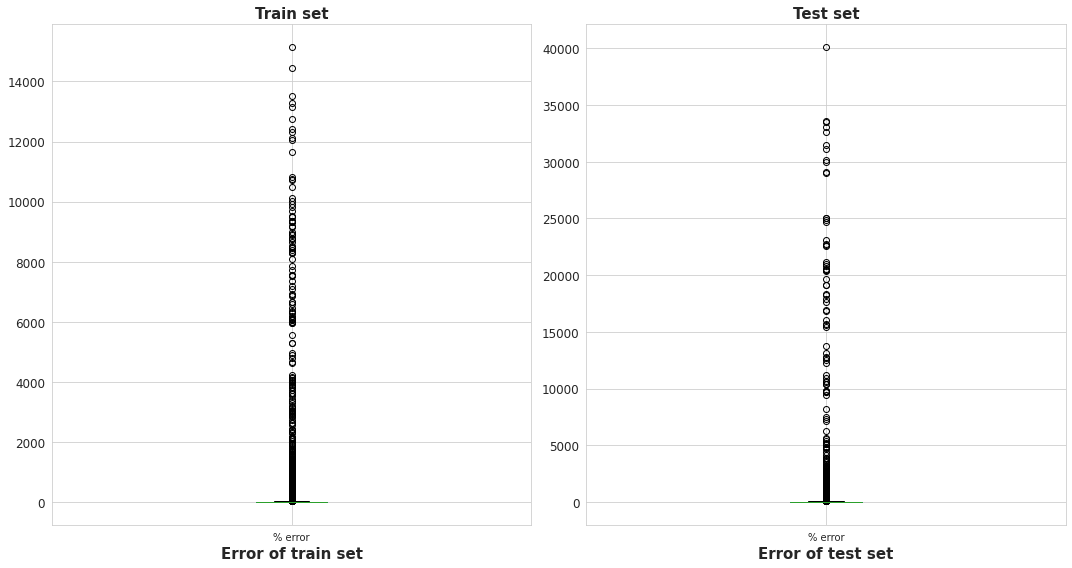

In [163]:
# Create figure and subplots
error_train = train_concat_error[['% error']]
error_test = test_concat_error[['% error']]

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot columns in seperate ax
error_train.boxplot(ax=axs[0])
error_test.boxplot(ax=axs[1])
axs[0].set_title('Train set', fontsize=15, fontweight='bold')
axs[0].set_xlabel('Error of train set',fontsize=15, fontweight='bold')
axs[0].tick_params(axis = 'y',labelsize=12)
axs[1].set_title('Test set', fontsize=15, fontweight='bold')
axs[1].set_xlabel('Error of test set',fontsize=15, fontweight='bold')
axs[1].tick_params(axis = 'y',labelsize=12)
plt.tight_layout()

# Show the plot
plt.show();



>*In 2 sets, there're so many error outiers of high value. Error of test set is higher than error of train set, Model fits train set better than test set.*
>>*Filter observations having the high error in the next steps*

In [201]:
def high_error(df: pd.DataFrame):
  _outlier = df.loc[df['% error'] > df['% error'].quantile(0.90), :]
  list_index = _outlier.index.to_list()
  df_error_outlier = car_price_new1.loc[list_index, :]
  return  df_error_outlier

# Excution on train set
print('Locate observations of train set being larger than', train_concat_error['% error'].quantile(0.90),'%')
train_outlier_error = high_error(train_concat_error)
train_outlier_error.head()

# Excution on test set
print('Locate observations of train set being larger than', test_concat_error['% error'].quantile(0.90),'%')
test_outlier_error = high_error(test_concat_error)
test_outlier_error.head()


Locate observations of train set being larger than 53.357801219804635 %


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2364,45816271,1254,1292,BMW,others,2016,Jeep,Yes,Petrol,3.0,74674,6.0,Automatic,4x4,04-May,Left wheel,White,12
16354,45771232,314,1172,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Diesel,3.5,132630,6.0,Automatic,Rear,04-May,Left wheel,Silver,12
8677,45812794,627,934,TOYOTA,Camry,2015,Sedan,Yes,Petrol,2.5,122758,4.0,Automatic,Front,04-May,Left wheel,Grey,12
9647,45813614,200,0,FORD,others,1996,Microbus,Yes,Diesel,2.5,200000,4.0,Manual,Rear,>5,Left wheel,White,0
9142,45615545,251,530,NISSAN,others,2013,Jeep,Yes,Petrol,1.6,153888,4.0,Automatic,4x4,04-May,Left wheel,White,0


Locate observations of train set being larger than 135.80813972219565 %


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19156,45765253,470,738,others,others,2017,Jeep,Yes,Petrol,1.4,70941,4.0,Automatic,Front,04-May,Left wheel,Green,12
4022,45794538,1800,0,others,others,1984,Jeep,No,Petrol,1.6,200000,4.0,Manual,4x4,04-May,Left wheel,White,10
15648,45789848,9948,707,SSANGYONG,others,2011,Jeep,Yes,Diesel,2.0,76640,4.0,Automatic,Front,04-May,Left wheel,Silver,4
18425,45644960,549,1058,TOYOTA,Highlander,2012,Jeep,Yes,Hybrid,3.5,0,6.0,Automatic,4x4,04-May,Left wheel,Grey,12
7502,41494638,90,0,HYUNDAI,Elantra,2013,Sedan,Yes,Petrol,1.8,100000,6.0,Automatic,Front,04-May,Left wheel,Golden,8


>*Need to check which cars and their characteristics that is hard to predict.*




<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90);
<ipython-input-234-420895ad99bf>:1

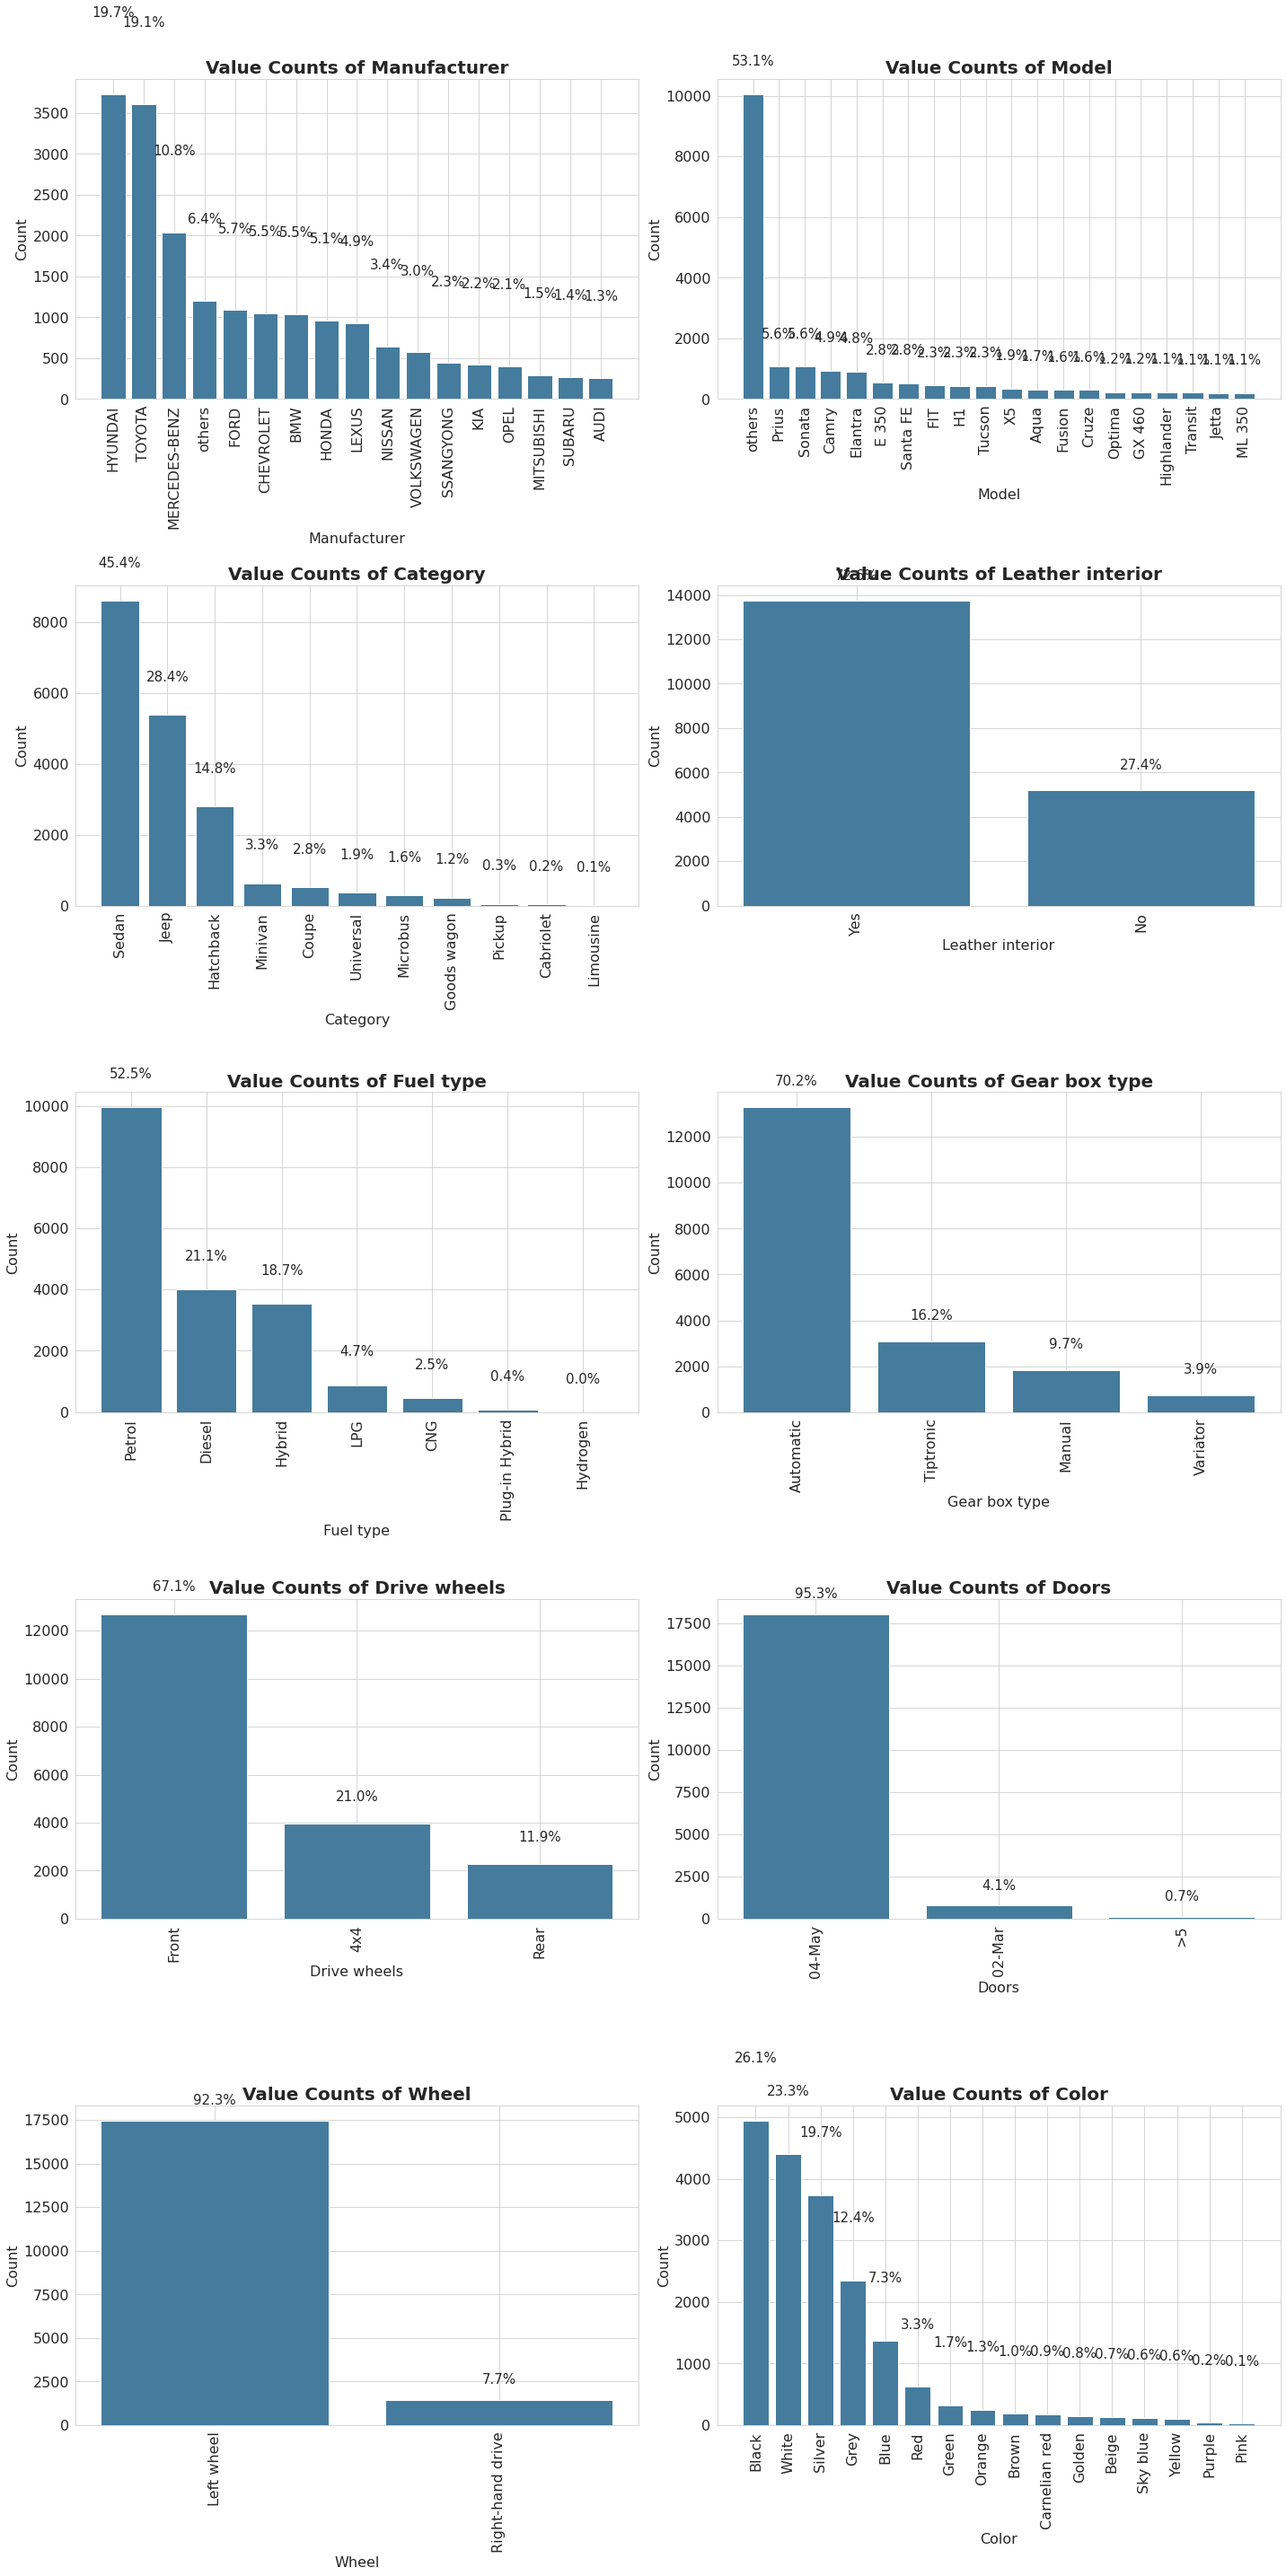

In [234]:
# Create a figure and subplots
fig, axes = plt.subplots(5,2, figsize=(20, 40))
axes = axes.flatten()
ob_cols = car_price_new.select_dtypes(include='object')

# Loop through each column in the dataframe
for i, col in enumerate(object_cols2.columns):
    counts = object_cols2[col].value_counts()  # Get the value counts for the column
    ax = axes[i]  # Get the subplot
    ax.bar(counts.index, counts.values, color='#457b9d')  # Create a bar chart of the counts
    ax.set_title(f'Value Counts of {col}', fontsize=20, fontweight='bold')  # Add a title to the subplot
    ax.set_xlabel(col, fontsize=16)  # Add a label to the x-axis
    ax.set_ylabel('Count', fontsize=16)  # Add a label to the y-axis
    ax.set_xticklabels(counts.index, rotation=90);
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
     # Add percentage labels to the bars
    for j, count in enumerate(counts):
        ax.text(j, count+0.05*counts.sum(), f"{count/counts.sum()*100:.1f}%", ha="center",fontsize=15);
    

# Adjust the spacing of the subplots
fig.tight_layout()


# Show the plot
plt.show();


<ipython-input-229-b21a1bfca338>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 0].set_xticklabels(count_train.index, rotation=90, fontsize=14);
<ipython-input-229-b21a1bfca338>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(count_test.index, rotation=90, fontsize=14);
<ipython-input-229-b21a1bfca338>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 0].set_xticklabels(count_train.index, rotation=90, fontsize=14);
<ipython-input-229-b21a1bfca338>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(count_test.index, rotation=90, fontsize=14);
<ipython-input-229-b21a1bfca338>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 0].set_xticklabels(count_train.index, rotation=90, fontsize=14);
<ipython-input-229-b21a1bfca338>:21: UserWarning: FixedFormatter should 

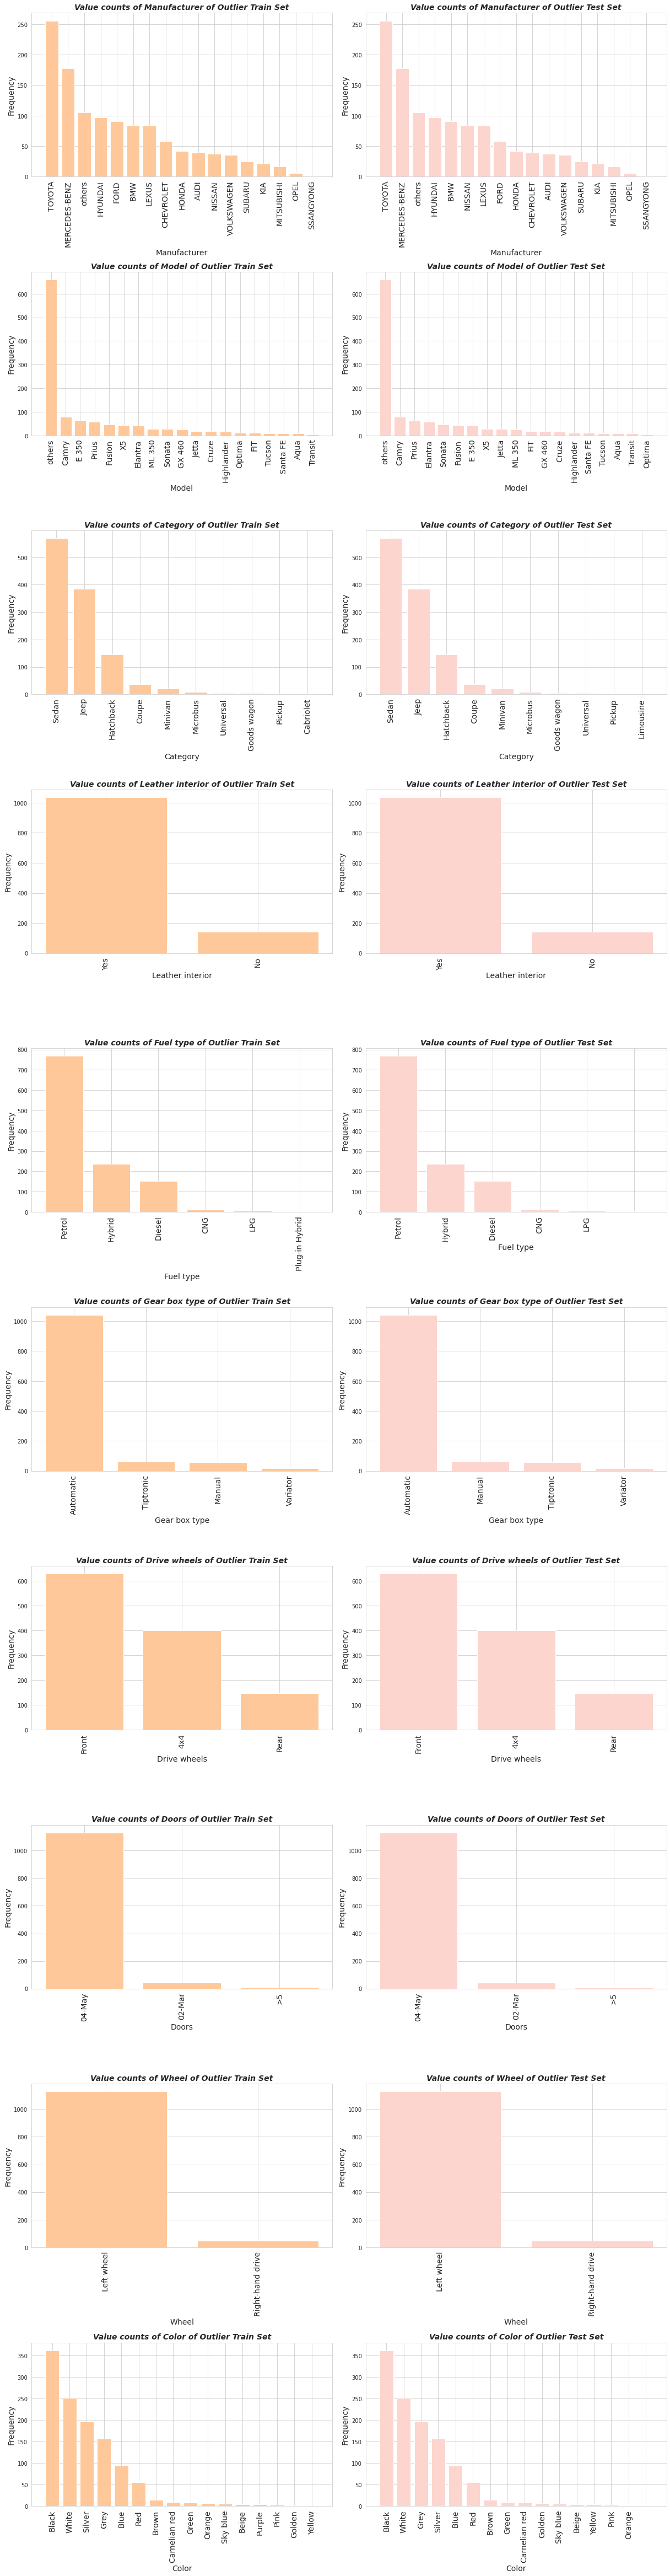

In [229]:



# Create subplots
fig, axs = plt.subplots(10, 2, figsize=(17, 65))

# Loop over each column and plot a histogram of train and test outlier error                                                                                              
for i, column in enumerate(object_cols.columns):
    # train set
    count_train = train_outlier_error[column].value_counts()
    axs[i, 0].bar(count_train.index, count_train.values, color='#fec89a')
    axs[i, 0].set_title(f"Value counts of {column} of Outlier Train Set", fontsize=14, fontweight='bold', fontstyle='italic')
    axs[i, 0].set_xlabel(column, fontsize=14)
    axs[i, 0].set_ylabel("Frequency",fontsize=14)
    axs[i, 0].set_xticklabels(count_train.index, rotation=90, fontsize=14);
    
    
    # test set
    count_test = test_outlier_error[column].value_counts()
    axs[i, 1].bar(count_train.index, count_train.values, color='#fcd5ce')
    axs[i, 1].set_title(f"Value counts of {column} of Outlier Test Set", fontsize=14, fontweight='bold', fontstyle='italic')
    axs[i, 1].set_xlabel(column, fontsize=14)
    axs[i, 1].set_ylabel("Frequency", fontsize=14)
    axs[i, 1].set_xticklabels(count_test.index, rotation=90, fontsize=14);
# just subplot spacing
fig.tight_layout()
plt.show();


>*Vehicles that are difficult to predict its price have the following criteria*
Manufacturer: ToYoTA, Mercedes-Benz, HUYNDAI, and others*

*  *Manufacturer: ToYoTA, Mercedes-Benz, HUYNDAI, and others*
*  *Model: others, Camry*
*  *Category: sedan, Jeep, Hatchback*
*  *Leather interior: Yes*
*  *Fuel type: Petrol, Hybrid*
*  *Gear box: Automatic*


















---


---

                                                          `***THE END***`

---


---



---


















